In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from collections import defaultdict
import random
plt.style.use("ggplot")
rcParams['figure.figsize'] = 10, 10

dimension = 10

# represents the size of the world
main_axis = ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '', '']
grid_axis = np.linspace(0, 13, 13)
grid_interval = grid_axis[1] - grid_axis[0]
door_width = 0.1
grid_world = np.zeros((dimension+1, dimension+1))

actions = {0:'up', 1: 'left', 2: 'down', 3:'right'}

class EscapeRoom:

    def __init__(self):
        """
        Initializes everything
        """

        # setting default values
        default_params = {'p1' : [4, 6], 'p2' : [2, 1], 'k1' : [2, 4], 'k2' : [3, 9],
                          'd1' : [1, 5], 'd2' : [5,10], 'i1' : [], 'i2' : []}

        # defining keys and doors
        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i2']
        self.i2 = default_params['i1']

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

    def reset(self):
        """
        Resets the board from start
        Returns:
            state: the initial state
        """

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        # defining keys and doors
        default_params = {'p1' : [4, 6], 'p2' : [2, 1], 'k1' : [2, 4], 'k2' : [3, 9],
                          'd1' : [7, 5], 'd2' : [8,7], 'i1' : [], 'i2' : []}

        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i1']
        self.i2 = default_params['i2']

        return self.state

    def step(self, action = [0,0]):

        """
        Args:
            action: This is an array with two entries, one of the first agent, and the other of the second agent
        Returns:
            state space: This is the current position of all the agents, the respective keys and their inventories
            reward: This is an array, which has two entries, one for each agent
            terminated: A boolean indicator of weather the episode had ended or not
            None: simply used for debugging
        """

        reward_array = [-1, -1]

        ############ MOVING FIRST AGENT #######################

        list_of_walls = [[0,i] for i in range(12)] + [[i, 0] for i in range(12)] + [[11, i] for i in range(12)] + [[i,11] for i in range(12)]

        # movements
        if action[0] == 0:
            self.p1[1] += 1
            if self.p1 in list_of_walls:
                self.p1[1] -= 1
        elif action[0] == 1:
            self.p1[0] -= 1
            if self.p1 in list_of_walls:

                self.p1[0] += 1
        elif action[0] == 2:
            self.p1[1] -= 1
            if self.p1 in list_of_walls:

                self.p1[1] += 1
        elif action[0] == 3:
            self.p1[0] += 1
            if self.p1 in list_of_walls:

                self.p1[0] -= 1

        # picking up key 1
        if self.k1:
            if self.p1 == self.k1:
                self.i1.append('k1')
                self.k1 = None

        ##################### NOW IT IS AGENT 2'S TURN ###########################

        # movements
        if action[1] == 0:
            self.p2[1] += 1
            if self.p2 in list_of_walls:
                self.p2[1] -= 1
        elif action[1] == 1:
            self.p2[0] -= 1
            if self.p2 in list_of_walls:
                self.p2[0] += 1
        elif action[1] == 2:
            self.p2[1] -= 1
            if self.p2 in list_of_walls:
                self.p2[1] += 1
        elif action[1] == 3:
            self.p2[0] += 1
            if self.p2 in list_of_walls:
                self.p2[0] -= 1

        # picking up key 2
        if self.k2:
            if self.p2 == self.k2:
                self.i2.append('k2')
                self.k2 = None

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        ## you reached the goal!
        
        if self.p1 == self.d1 and "k1" in self.i1 and self.p2 == self.d2 and "k2" in self.i2:
            reward_array[0] = 10
            return self.state, reward_array, [True, True], None

        if self.p2 == self.d2 and "k2" in self.i2:
            reward_array[1] = 10
            return self.state, reward_array, [False, True], None

        if self.p1 == self.d1 and "k1" in self.i1:
            reward_array[0] = 10
            return self.state, reward_array, [True, False], None

        ##
        
        # give negative reward if collide:
        if self.p2 == self.p1:
            reward_array = [-10, -10]
            return self.state, reward_array, [True, True], None

        return self.state, reward_array, [False, False], None

    def render(self):

        # to change positions
        agent1 = plt.Circle((grid_interval*(self.p1[0]+0.5),grid_interval*(self.p1[1]+0.5)), 0.3, color='r', alpha = 0.5)
        agent2 = plt.Circle((grid_interval*(self.p2[0]+0.5),grid_interval*(self.p2[1]+0.5)), 0.3, color='blue', alpha = 0.5)

        door1 = plt.Rectangle(((self.d1[0])*grid_interval, self.d1[1]*grid_interval), grid_interval, grid_interval, color = "red", alpha = 0.8)
        door2 = plt.Rectangle((self.d2[0]*grid_interval, (self.d2[1])*grid_interval), grid_interval, grid_interval, color = "blue", alpha = 0.8)

        if self.k1:
            key1 = plt.Rectangle(((self.k1[0]+0.375)*grid_interval,(self.k1[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "red", alpha = 0.5)
        if self.k2:
            key2 = plt.Rectangle(((self.k2[0]+0.375)*grid_interval,(self.k2[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "blue", alpha = 0.5)

        # wall -> DO NOT CHANGE
        wall1 = plt.Rectangle((0,0), grid_interval, 13, color = "black", alpha = 0.1)
        wall2 = plt.Rectangle((0,0), 13, grid_interval, color = "black", alpha = 0.1)
        wall4 = plt.Rectangle((0,grid_axis[-2]), 13, grid_axis[1], color = "black", alpha = 0.1)
        wall3 = plt.Rectangle((grid_axis[-2],0),grid_axis[1], 13, color = "black", alpha = 0.1)

        # get plot axis
        fig = plt.figure(figsize = (10,10))
        ax = plt.gca()

        # wall -> DO NOT CHANGE
        ax.add_patch(wall1)
        ax.add_patch(wall2)
        ax.add_patch(wall3)
        ax.add_patch(wall4)

        # world definitions
        ax.add_patch(door1)
        ax.add_patch(door2)
        if self.k1:
            ax.add_patch(key1)
        if self.k2:
            ax.add_patch(key2)

        # plot agents
        ax.add_patch(agent1)
        ax.add_patch(agent2)

        plt.xticks(ticks = grid_axis, labels = main_axis)
        plt.yticks(ticks = grid_axis, labels = main_axis)
        plt.show()

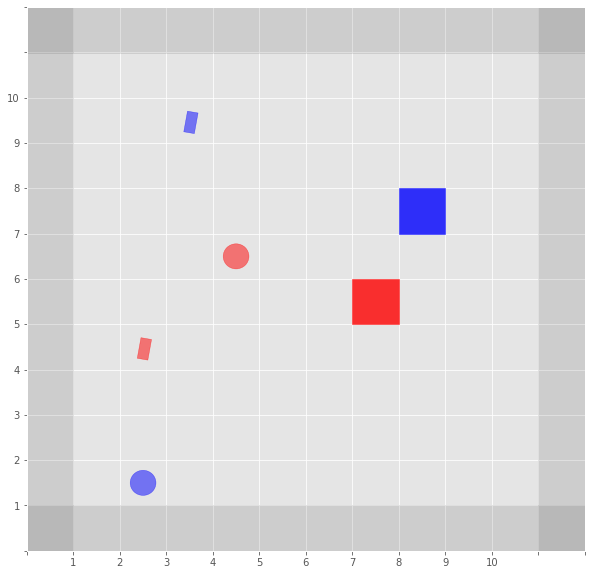

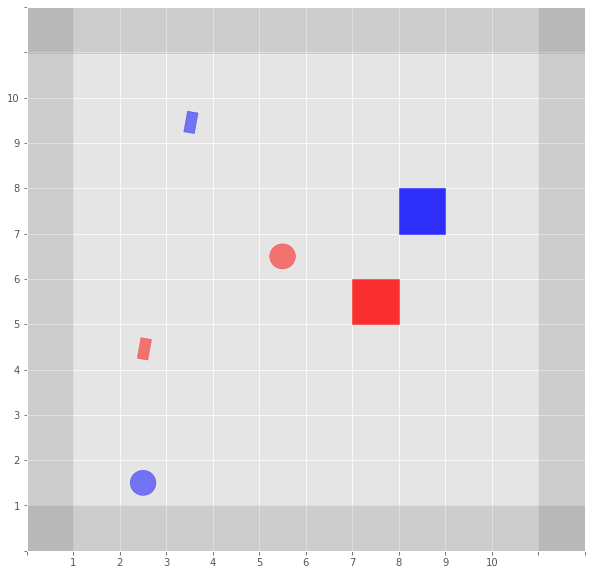

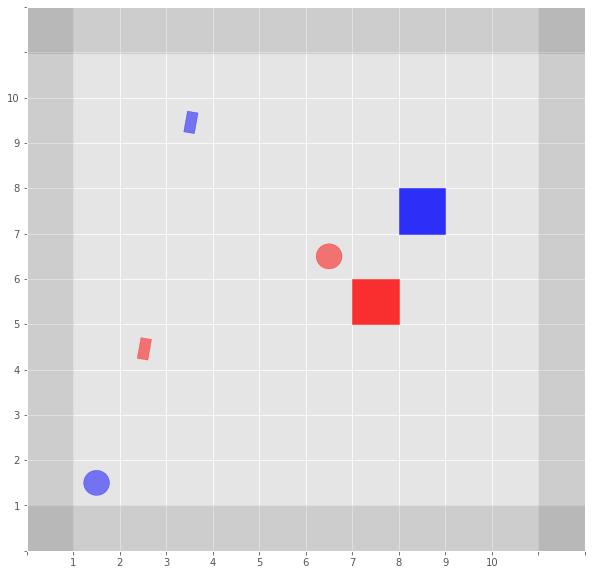

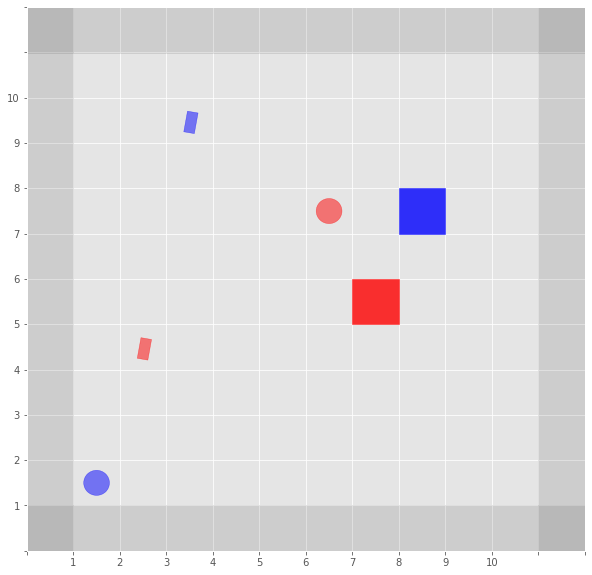

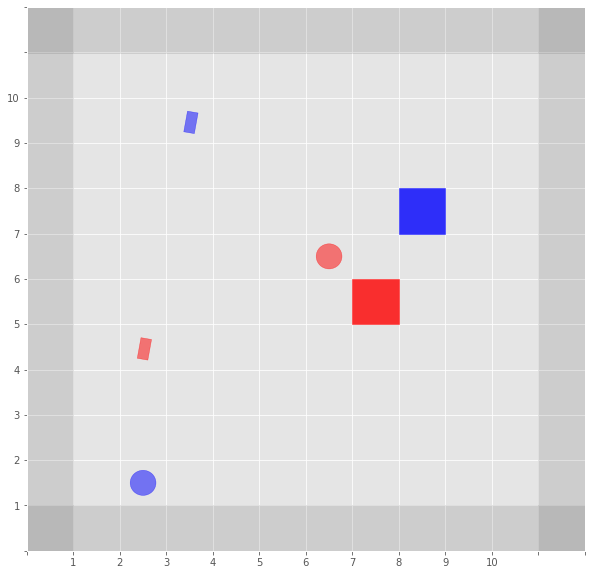

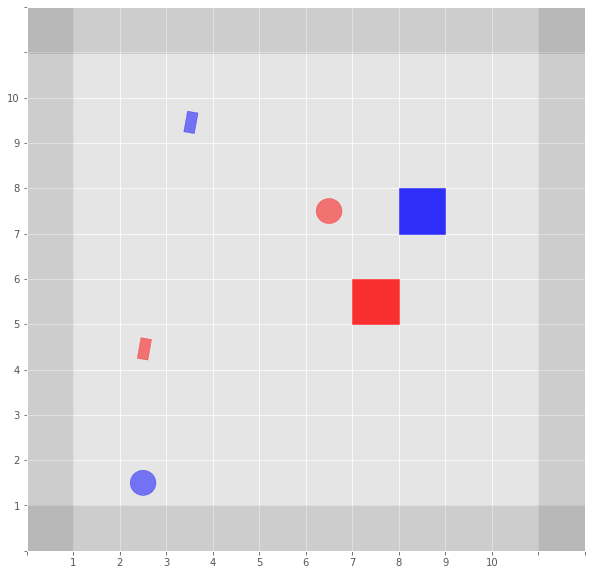

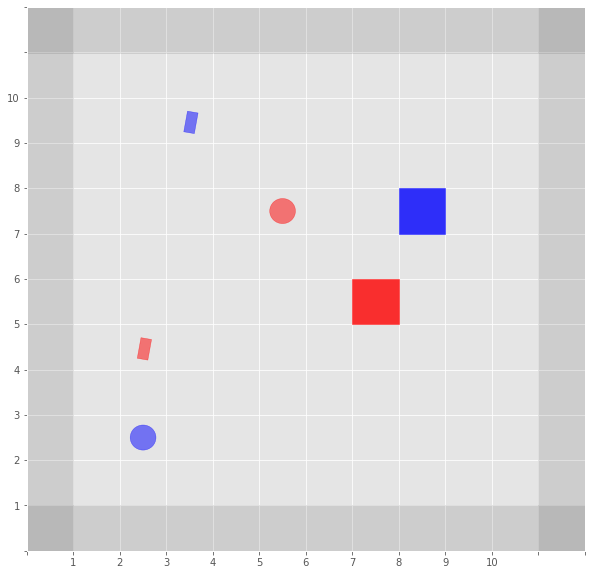

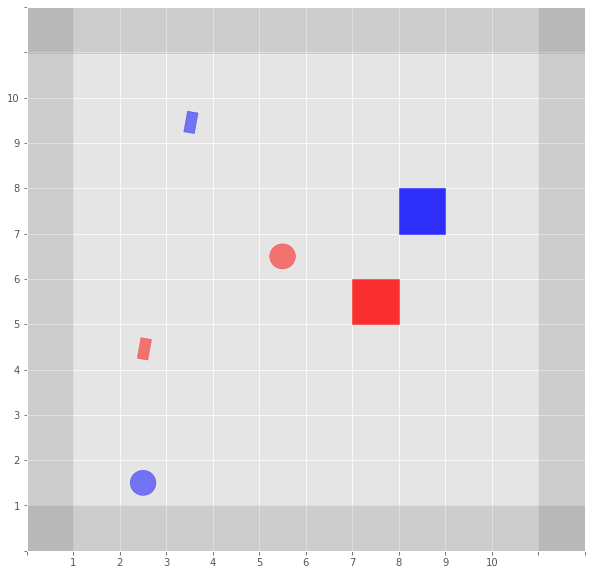

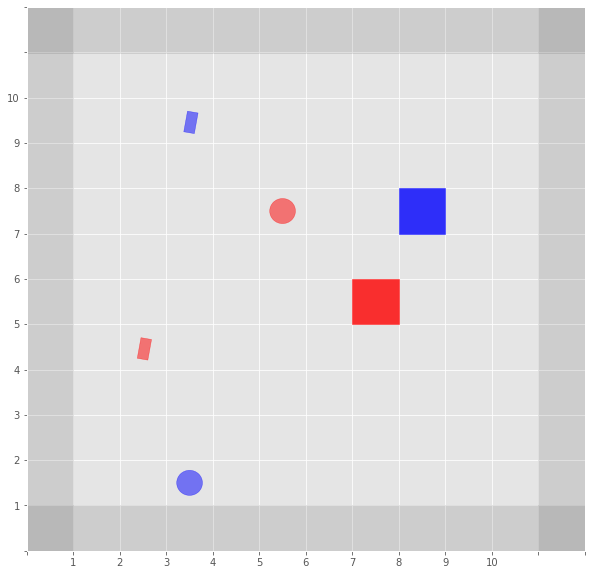

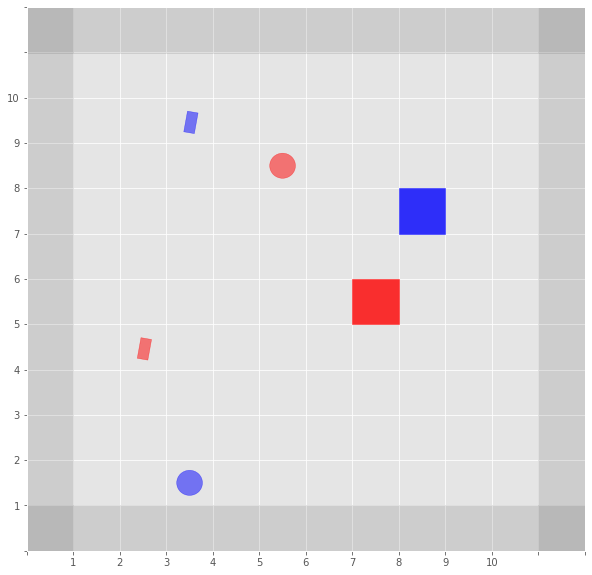

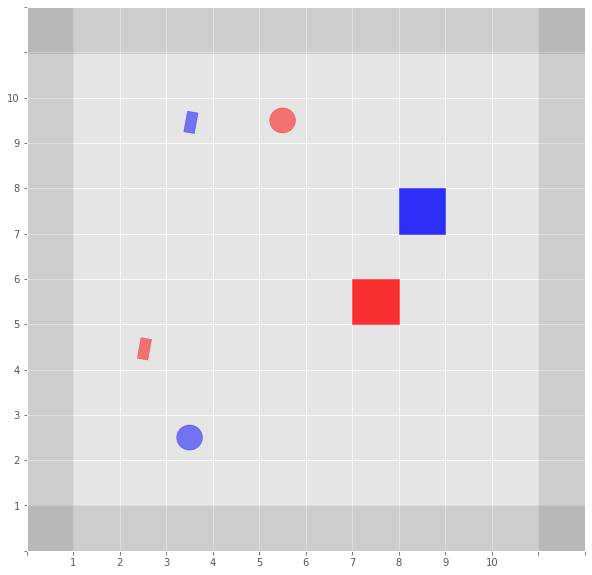

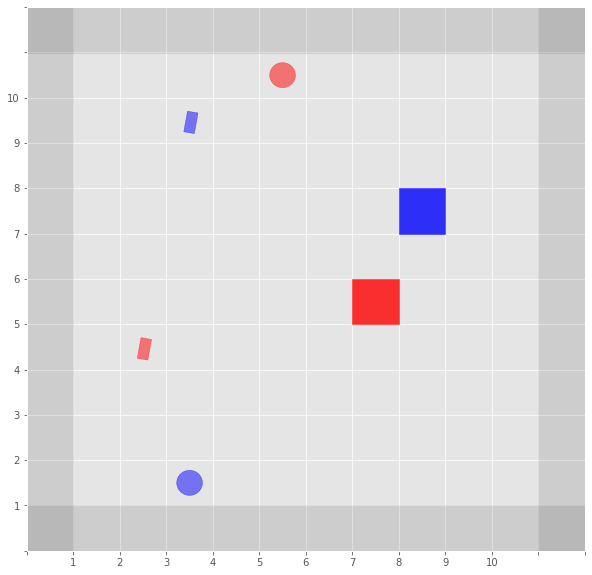

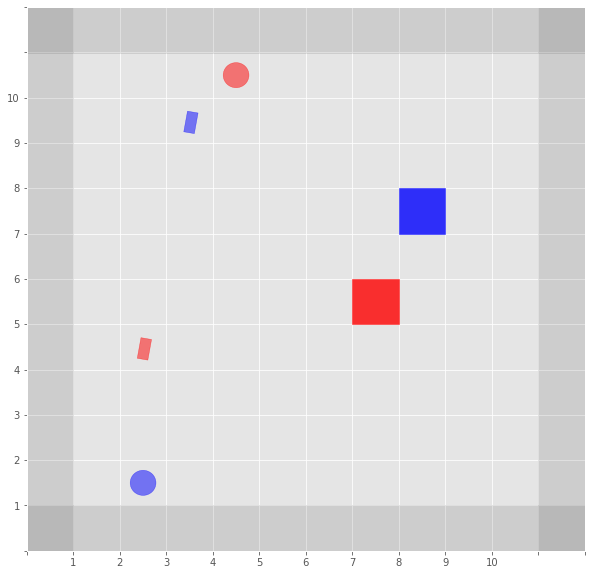

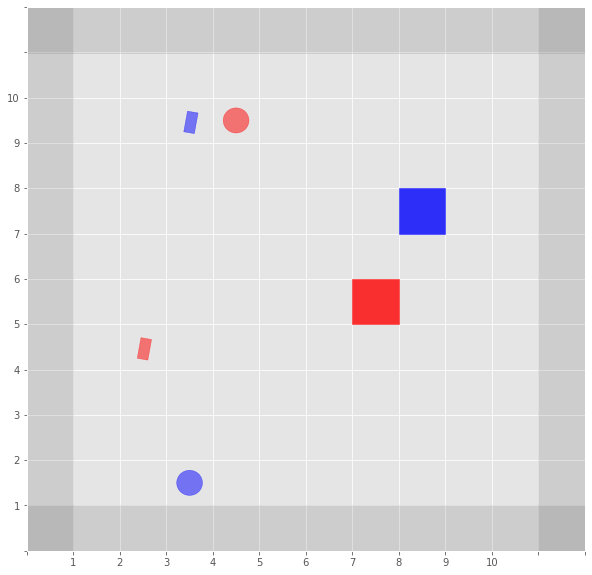

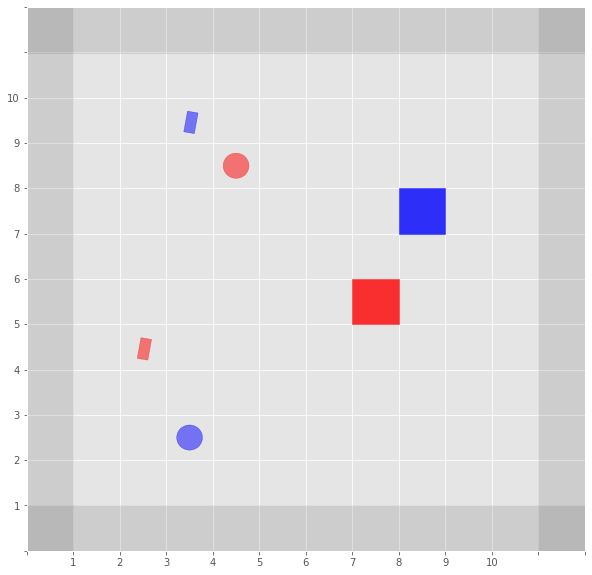

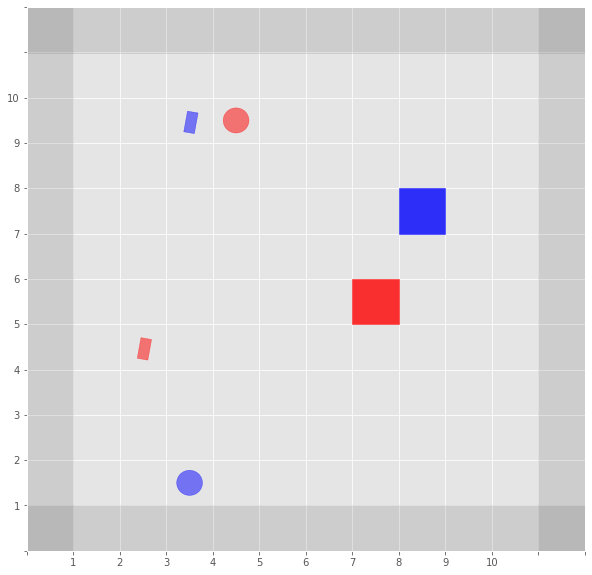

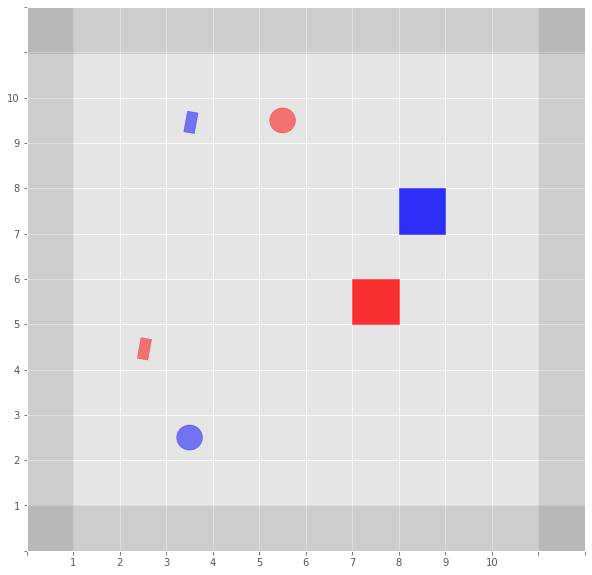

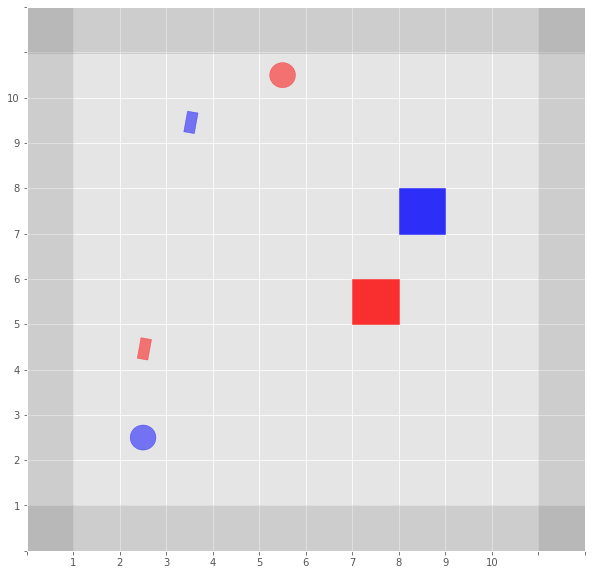

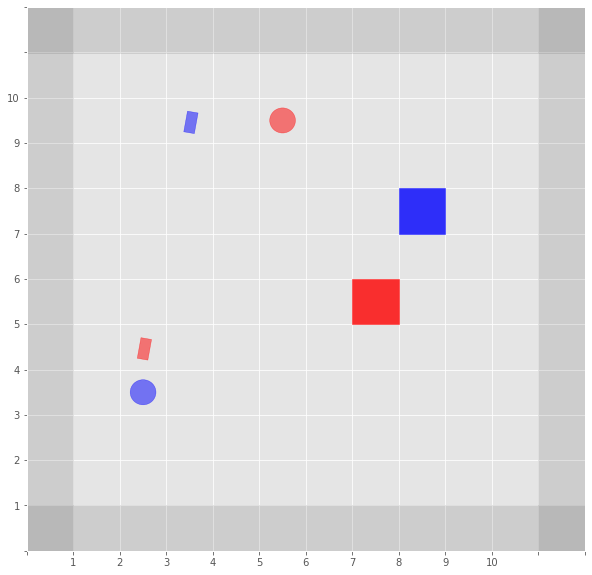

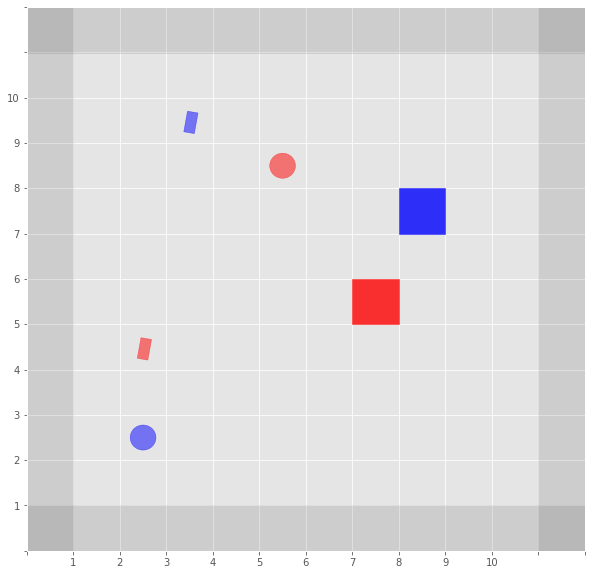

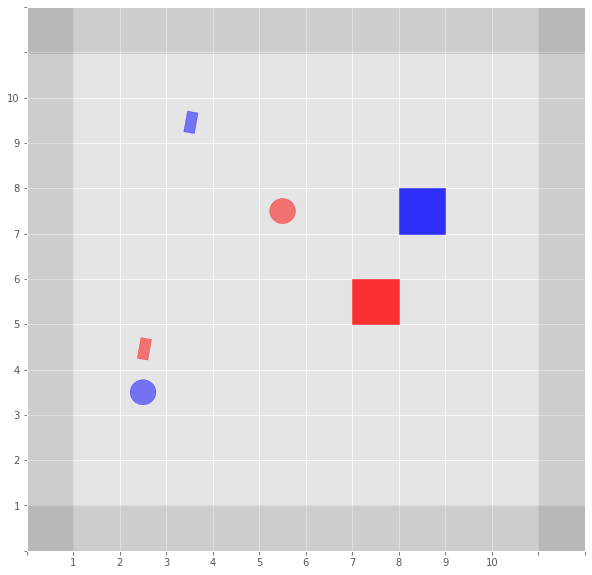

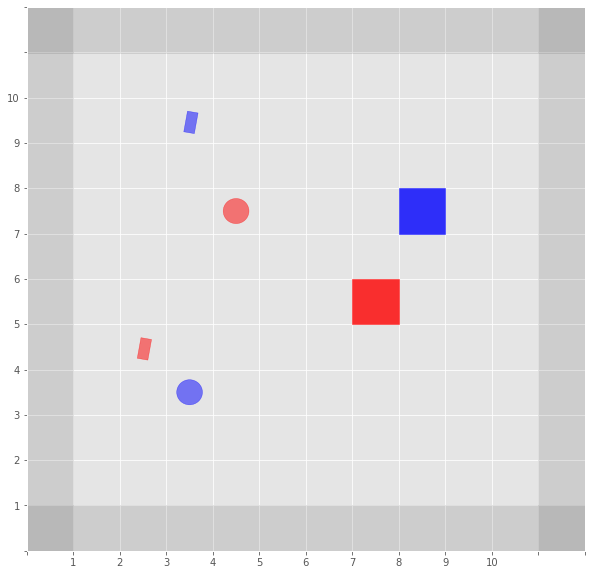

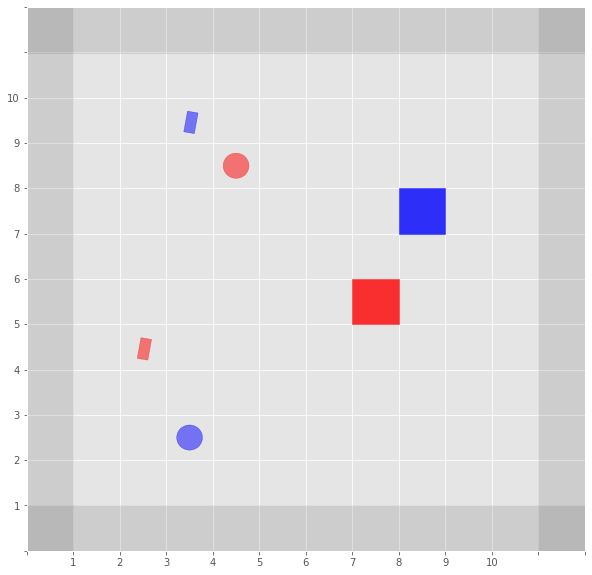

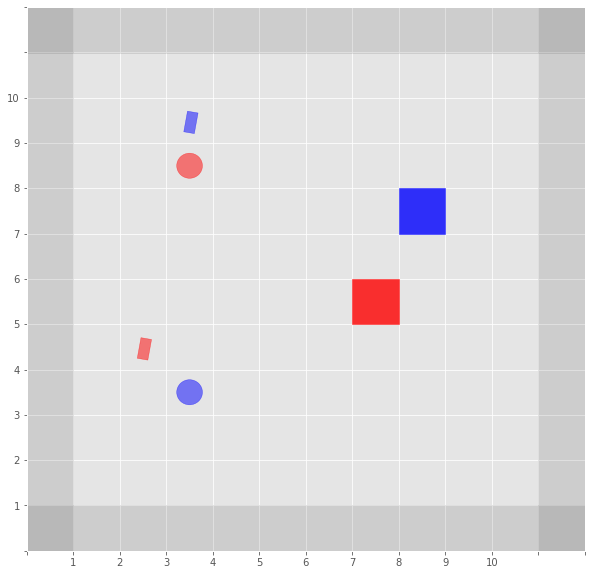

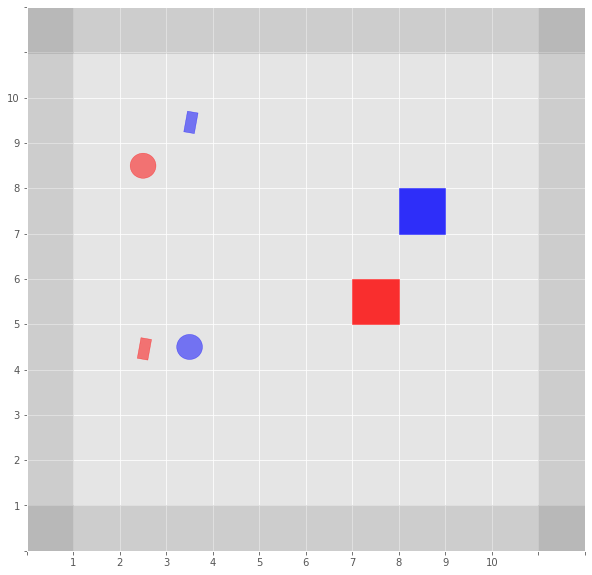

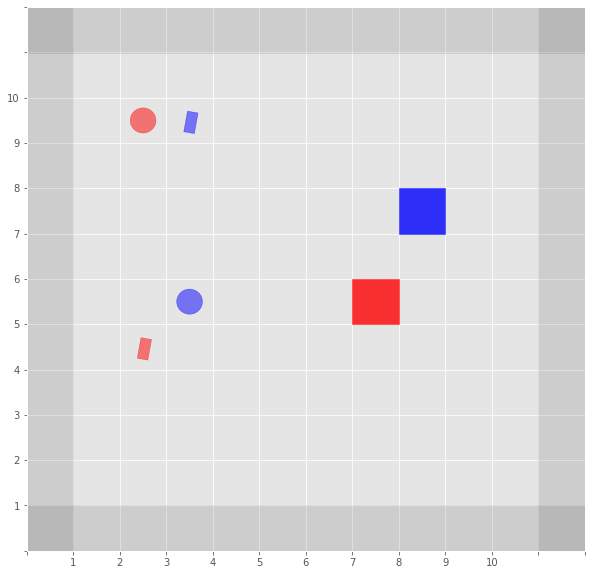

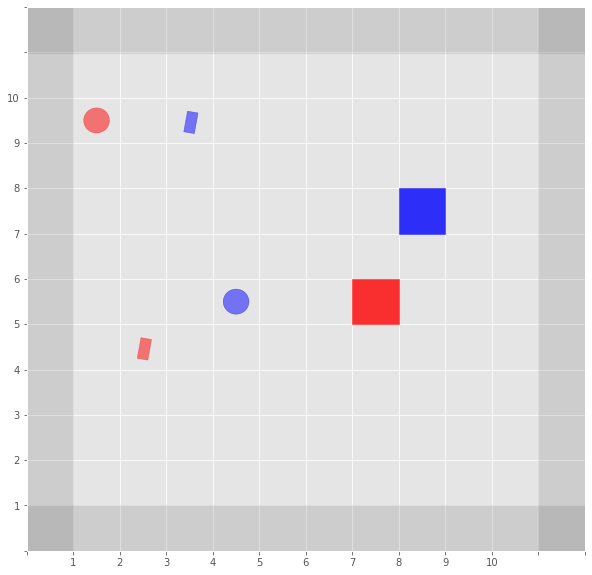

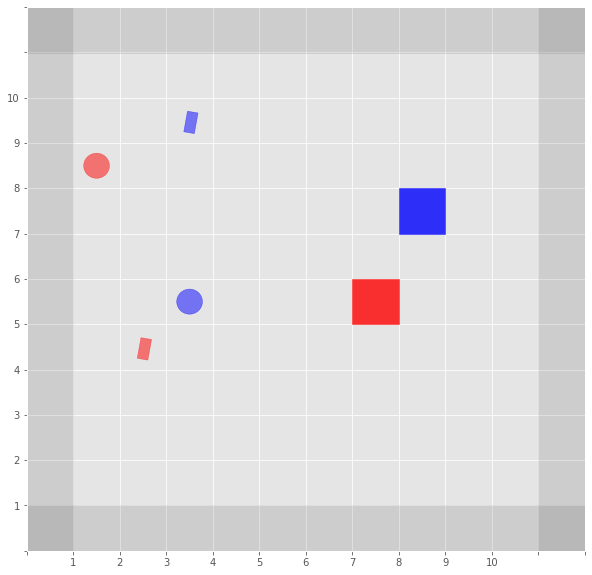

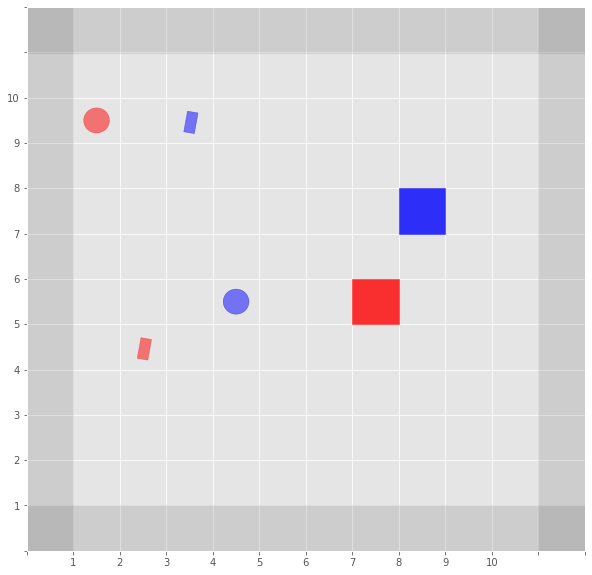

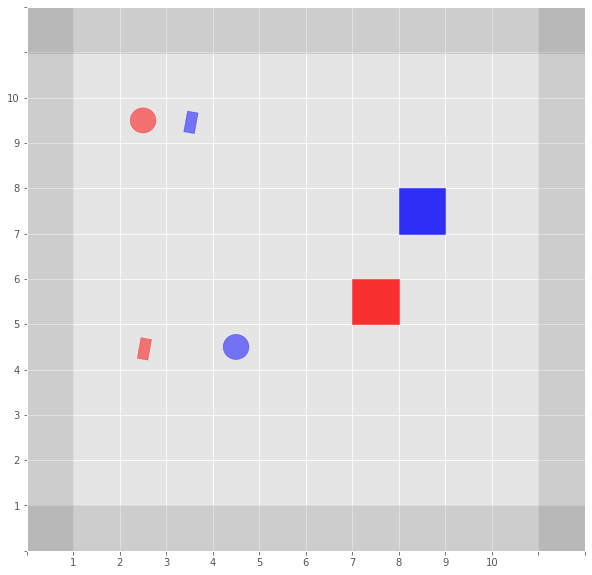

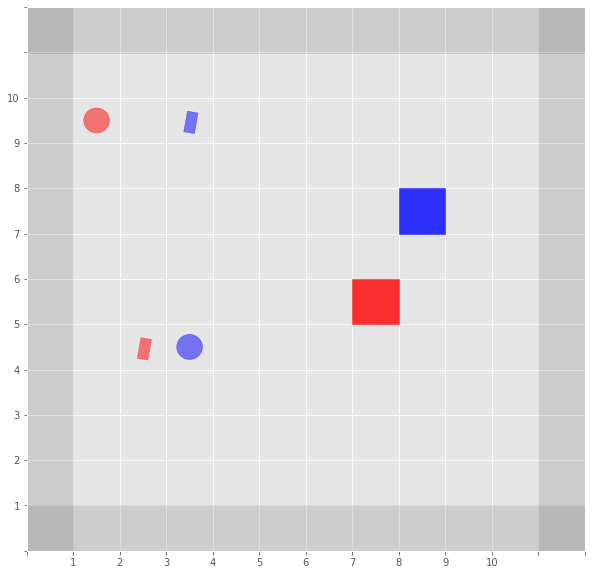

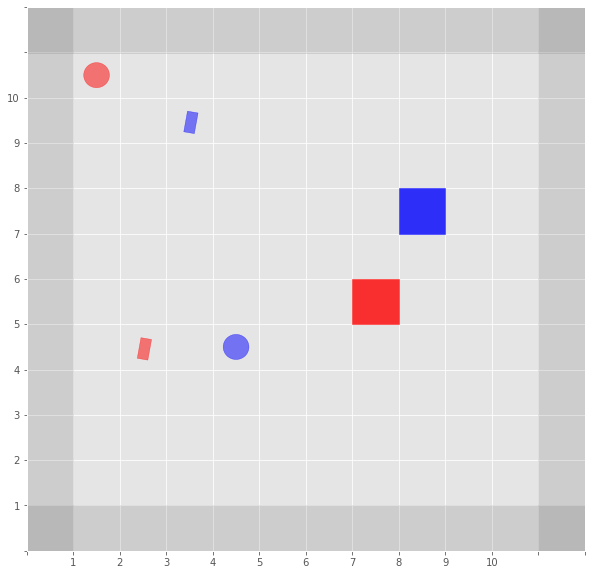

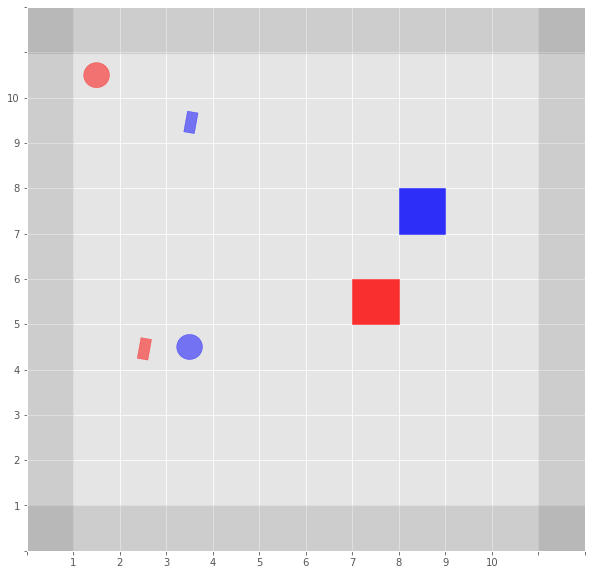

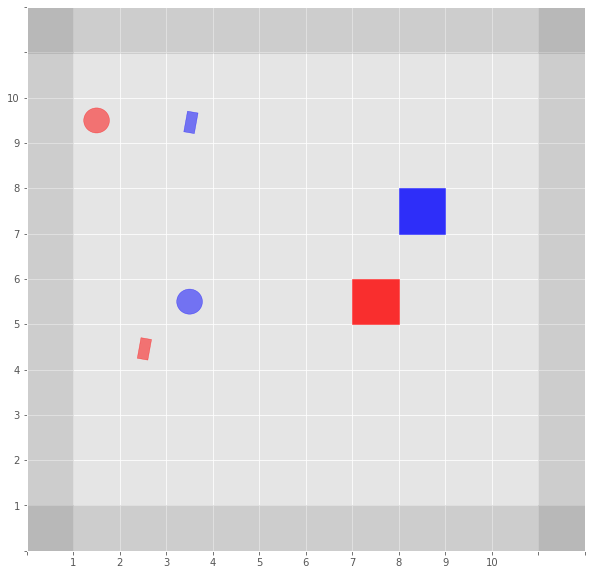

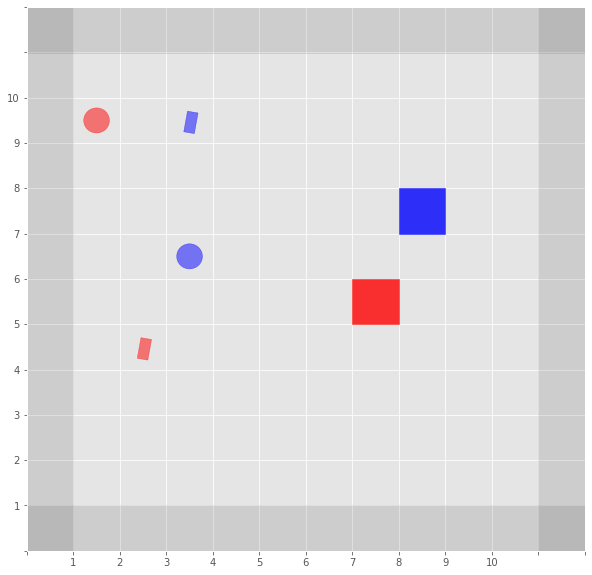

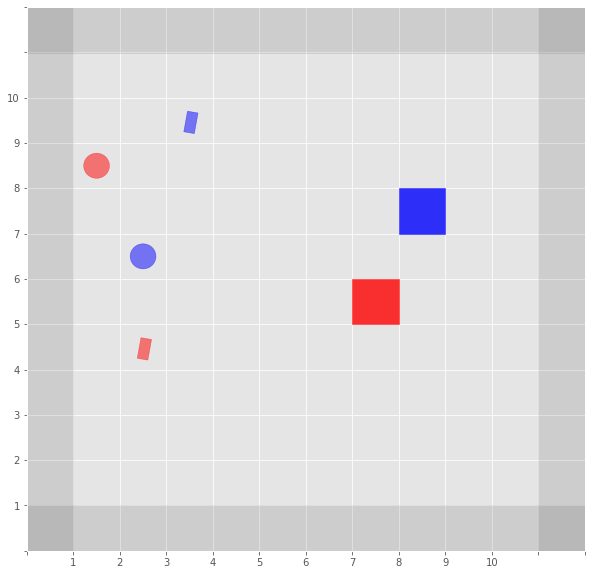

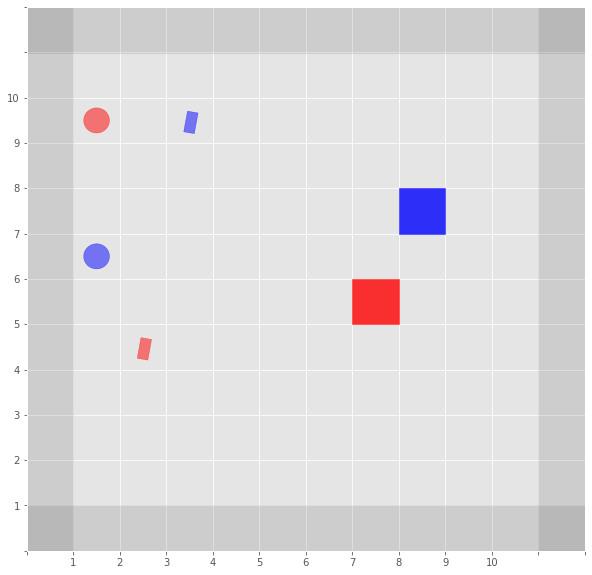

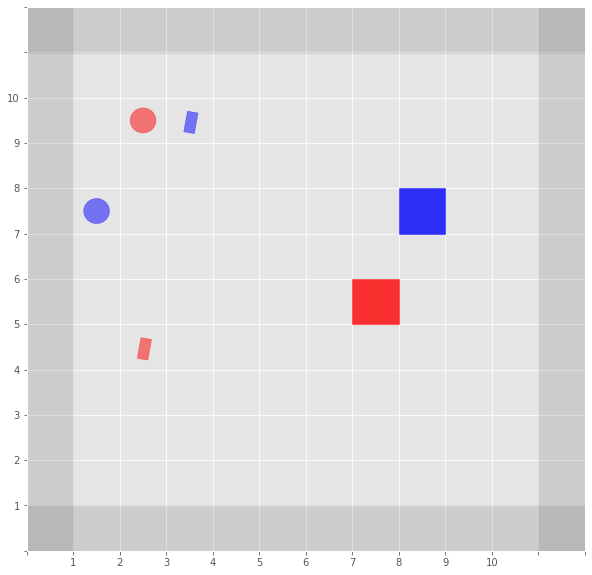

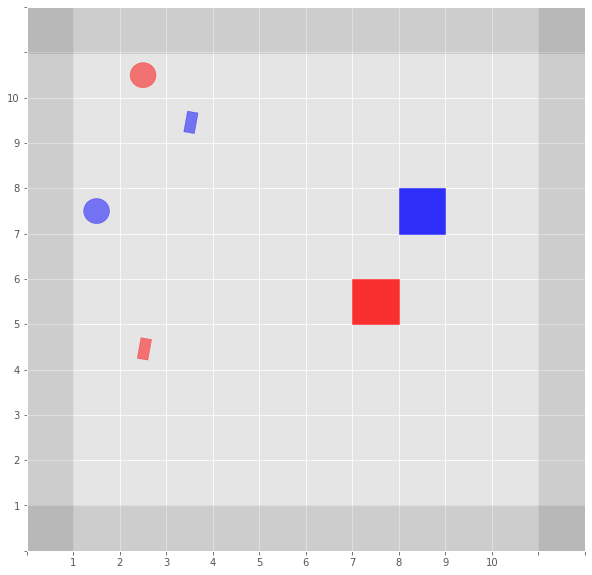

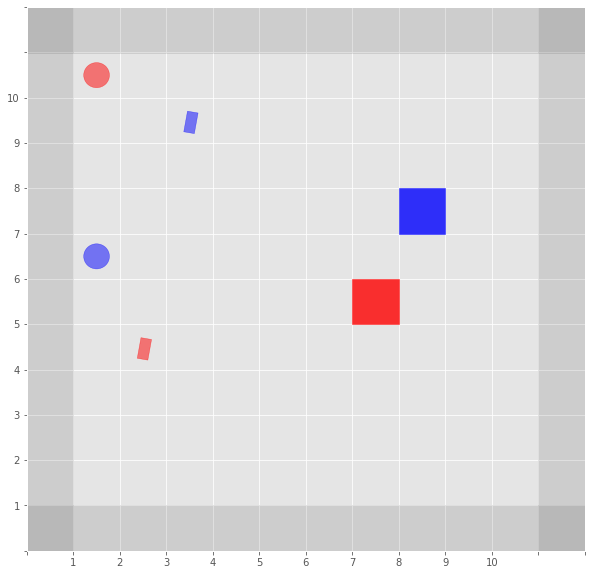

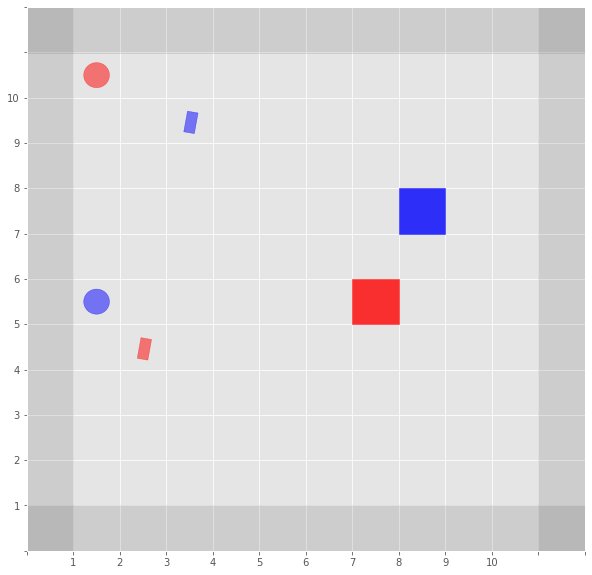

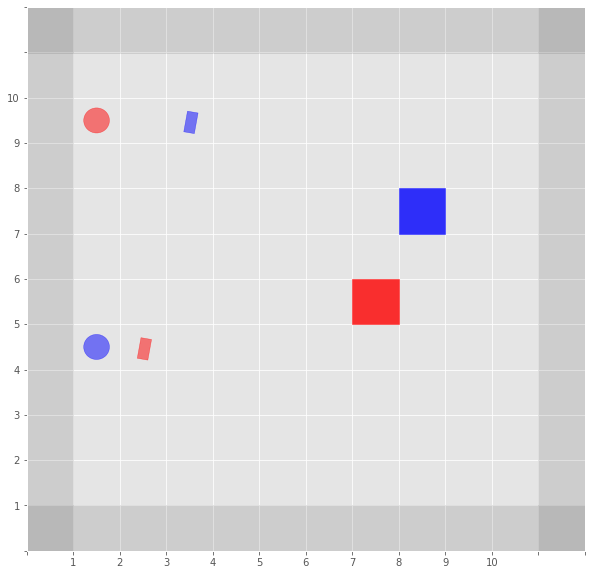

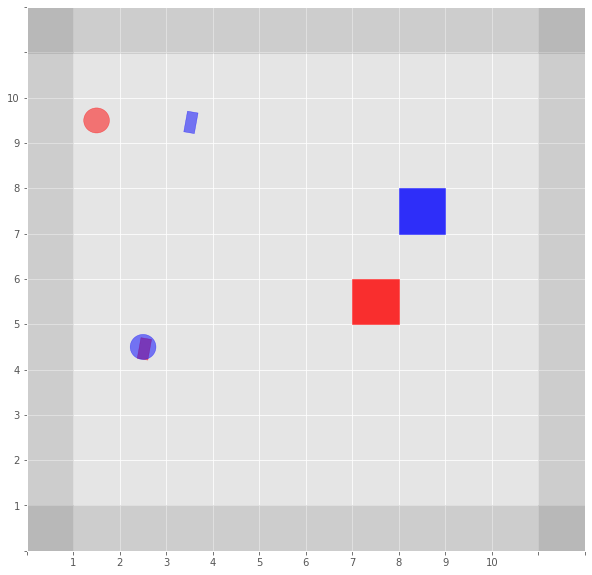

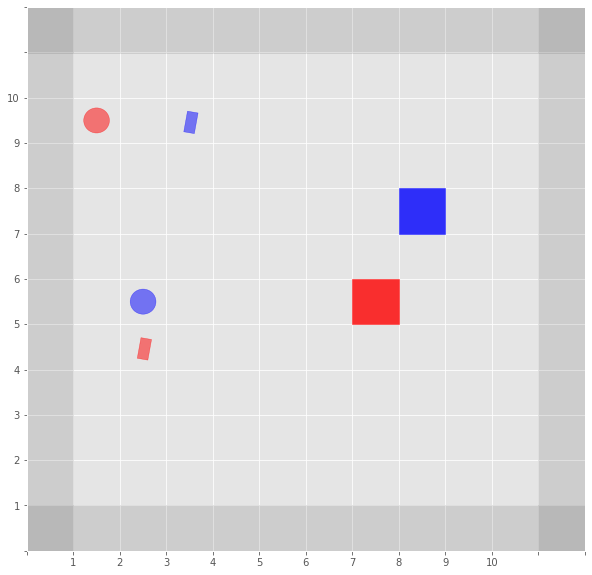

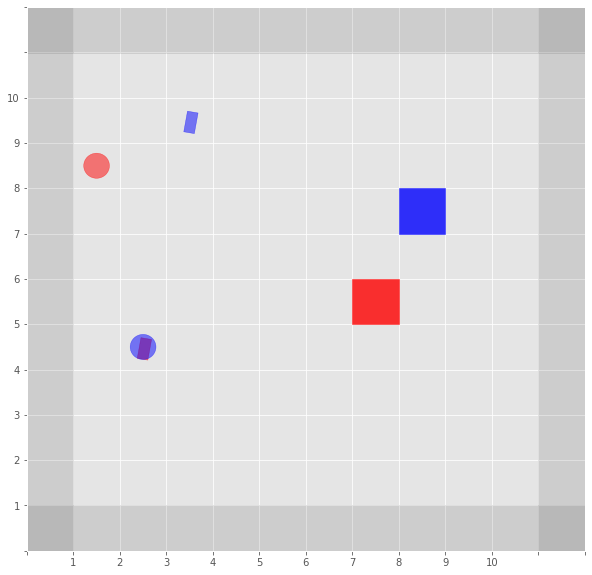

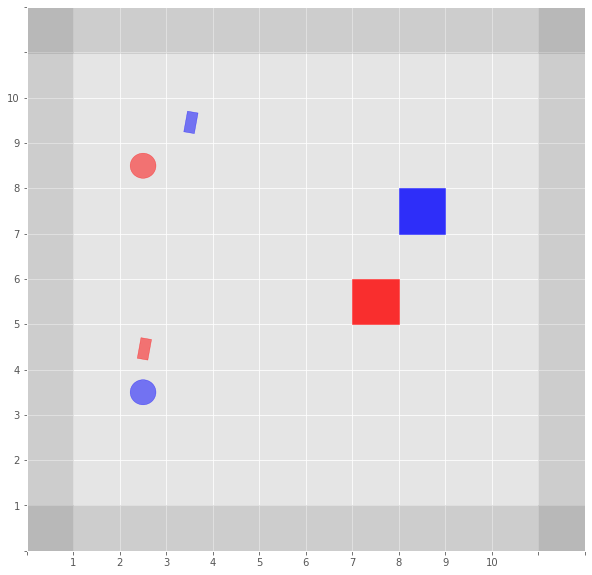

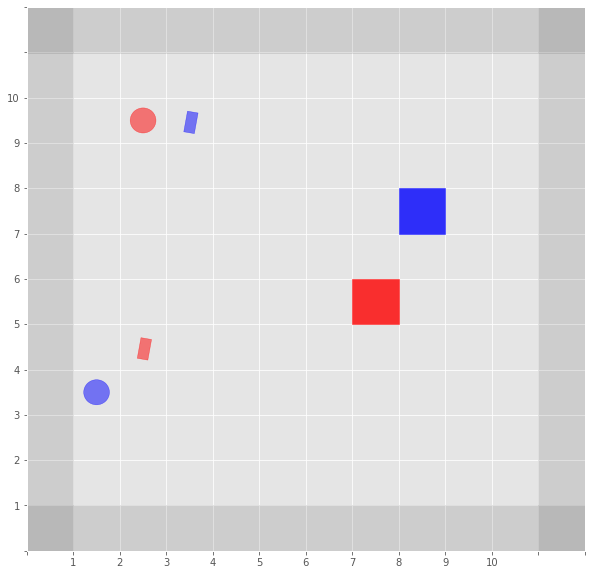

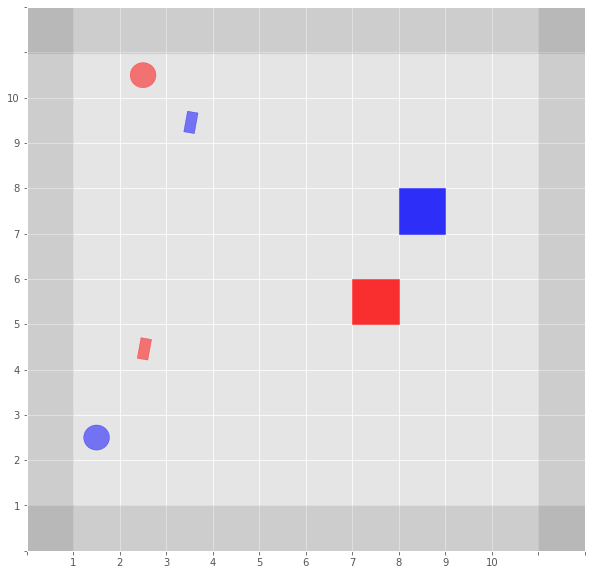

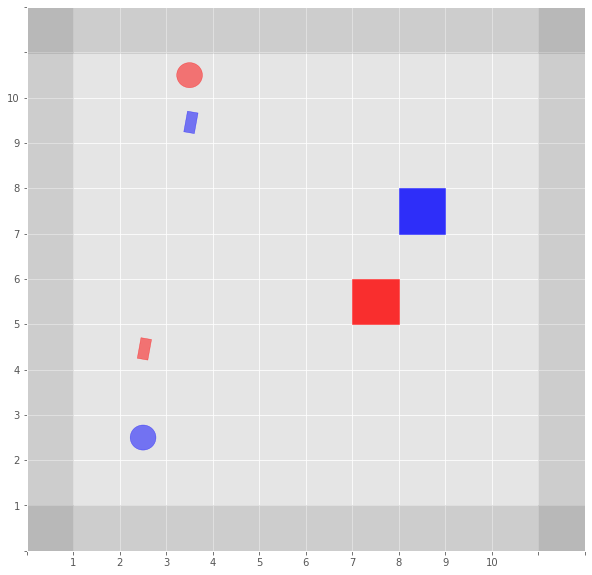

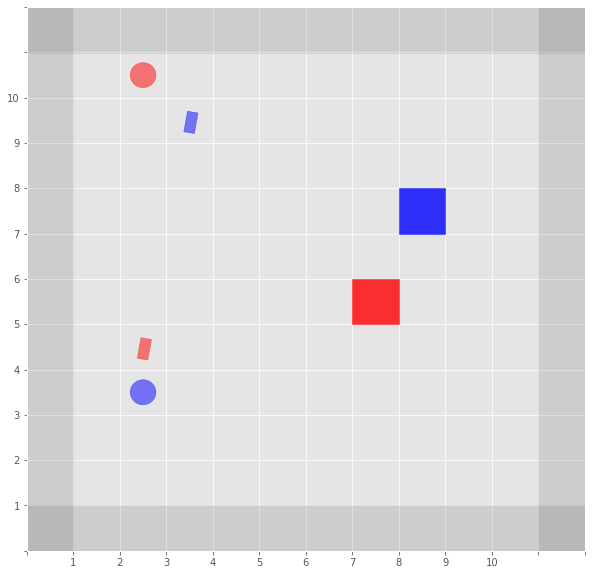

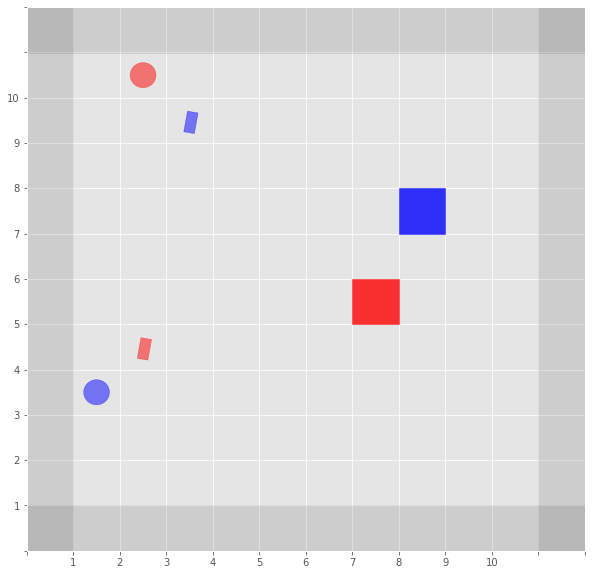

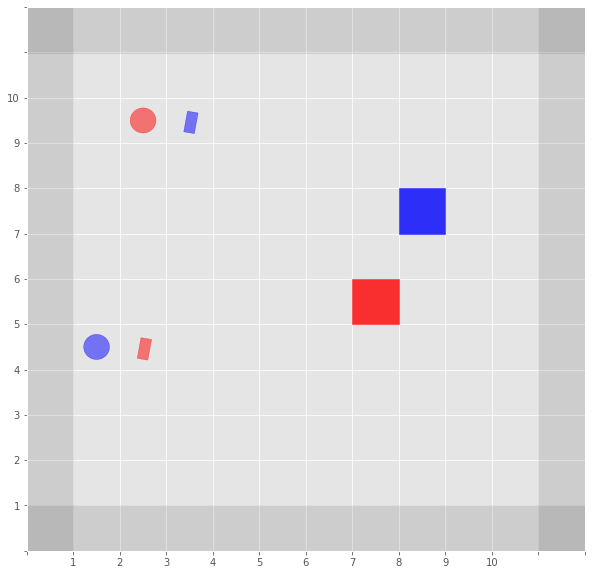

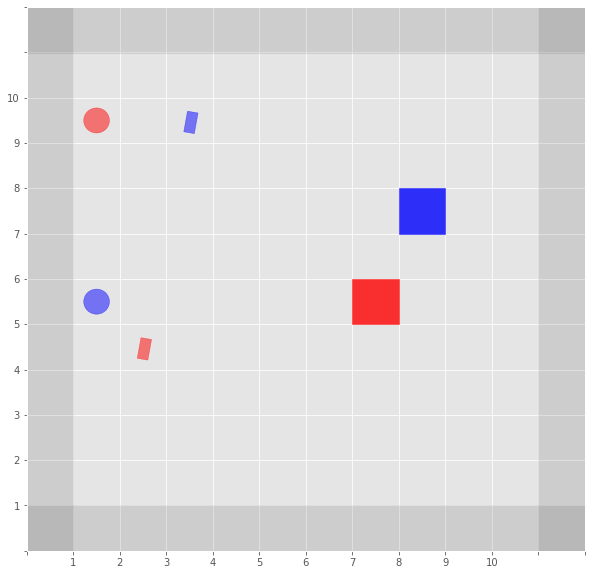

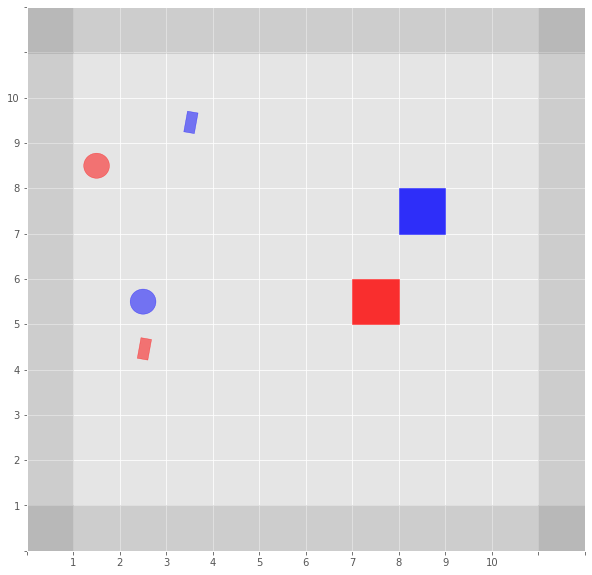

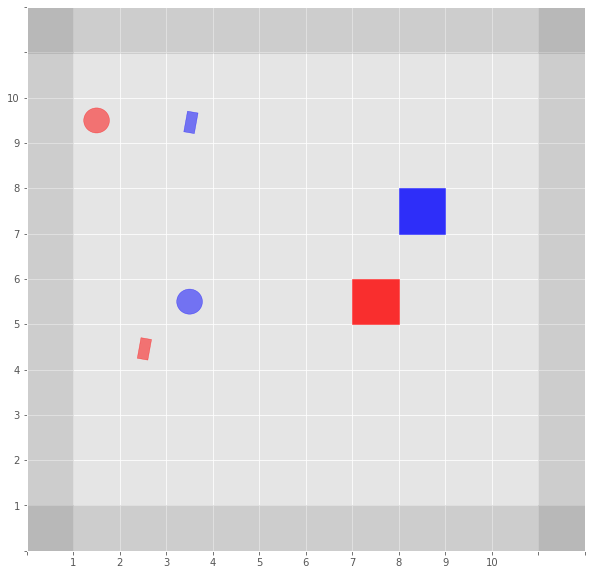

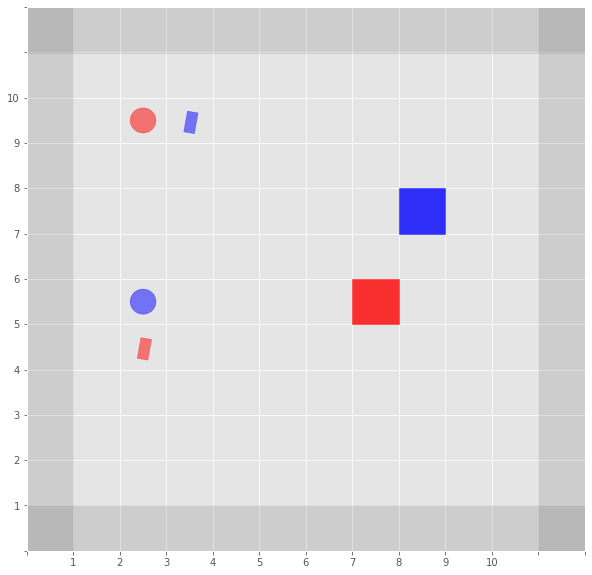

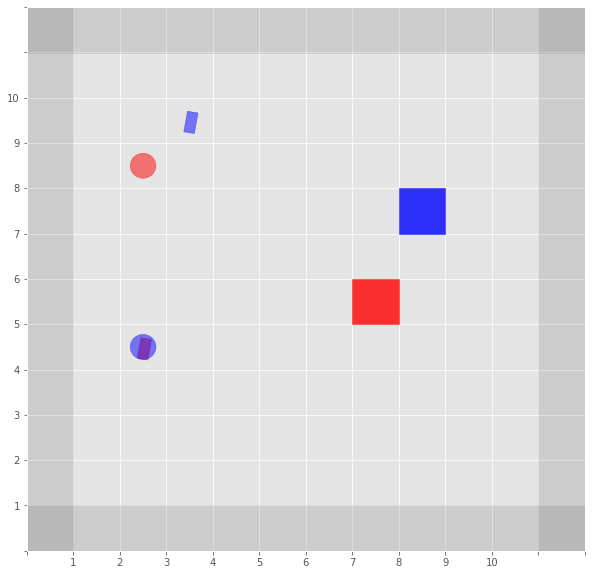

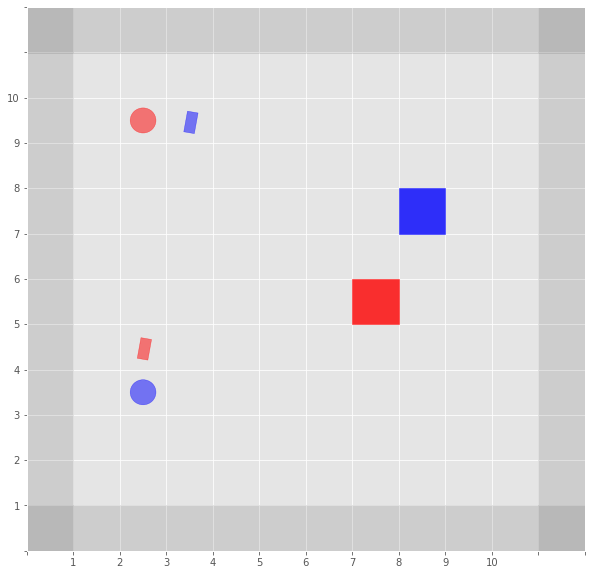

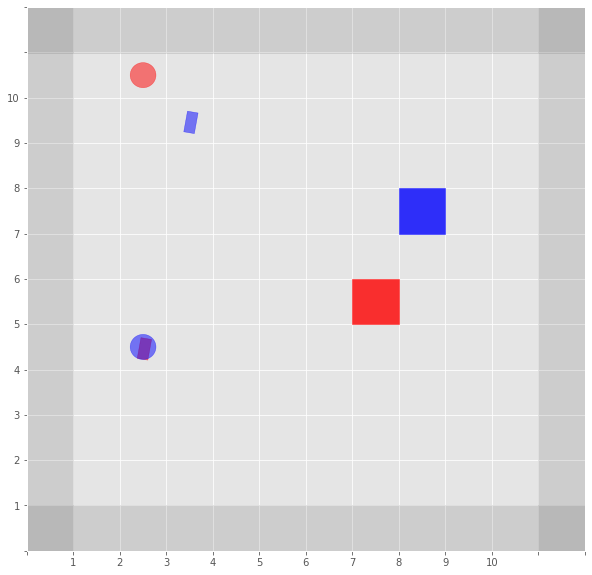

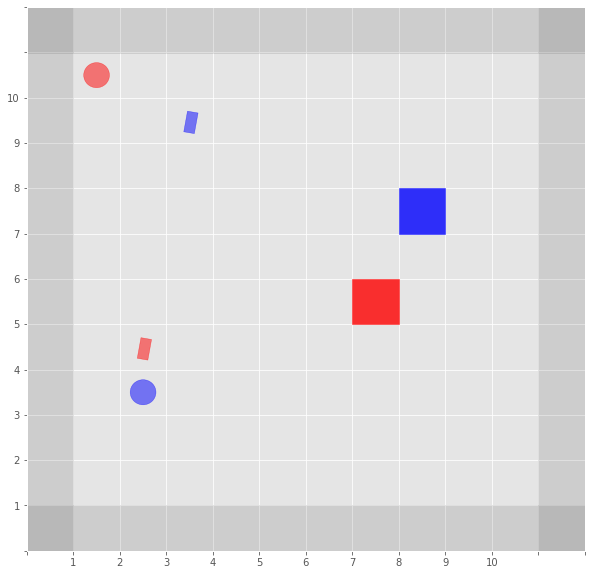

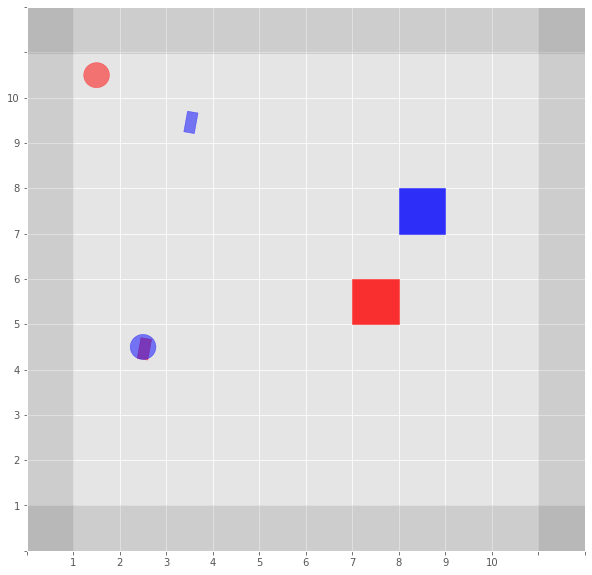

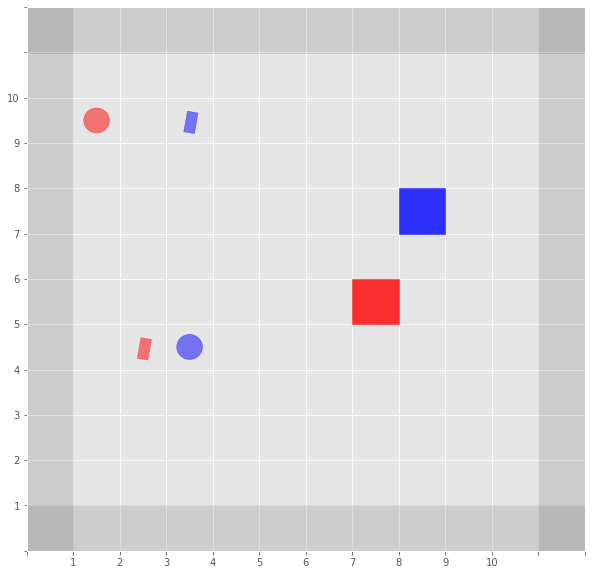

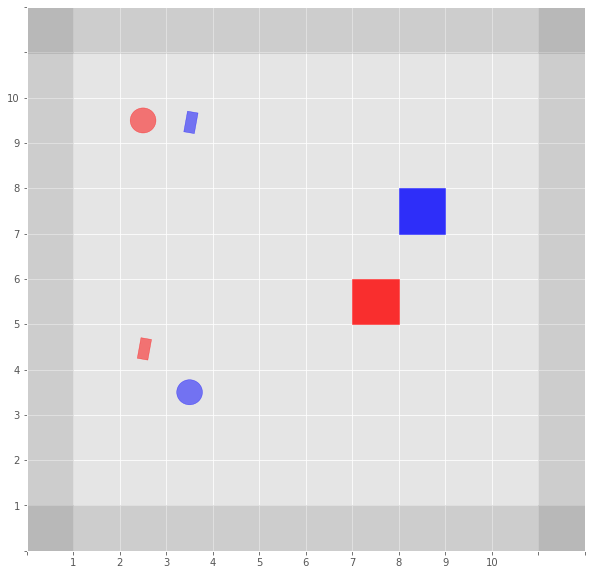

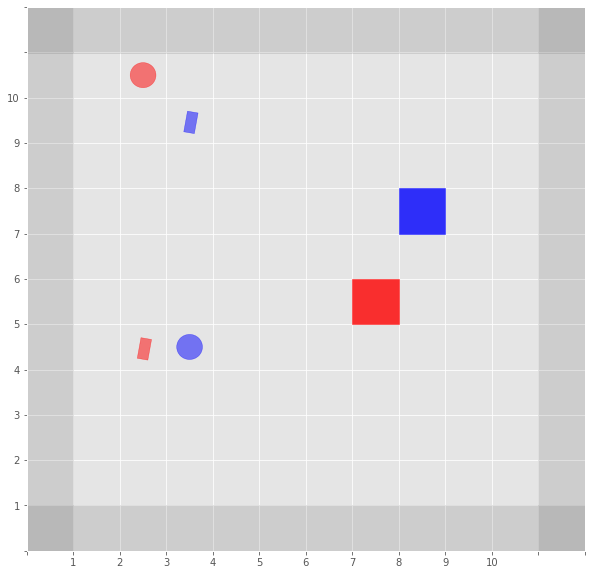

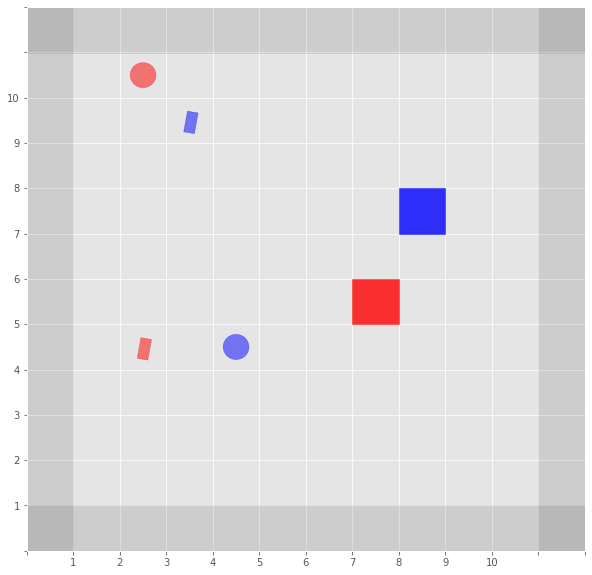

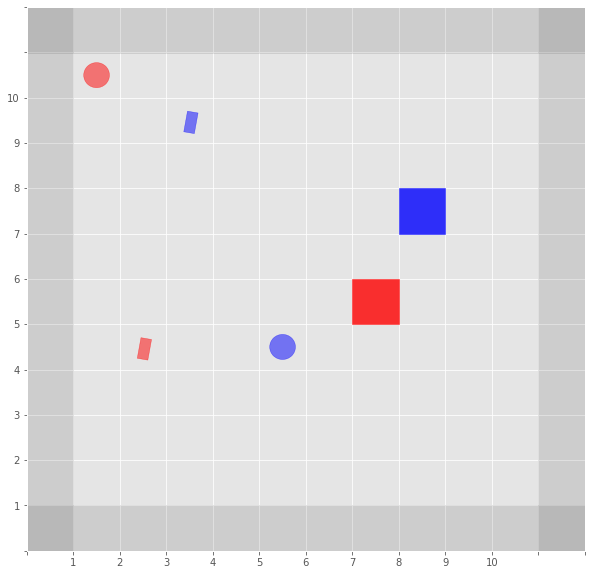

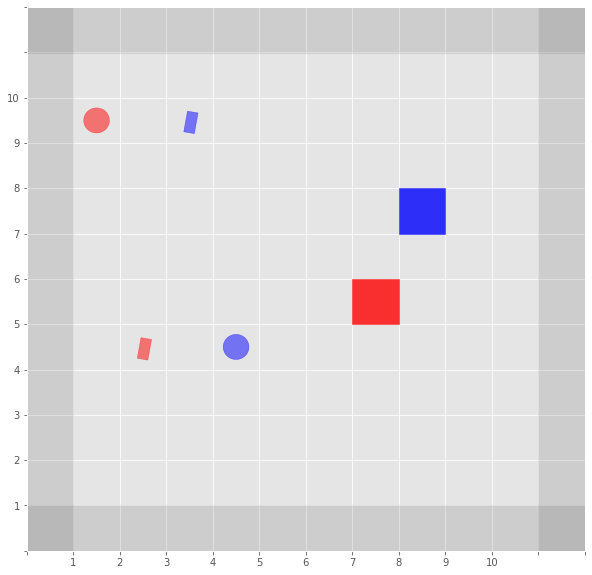

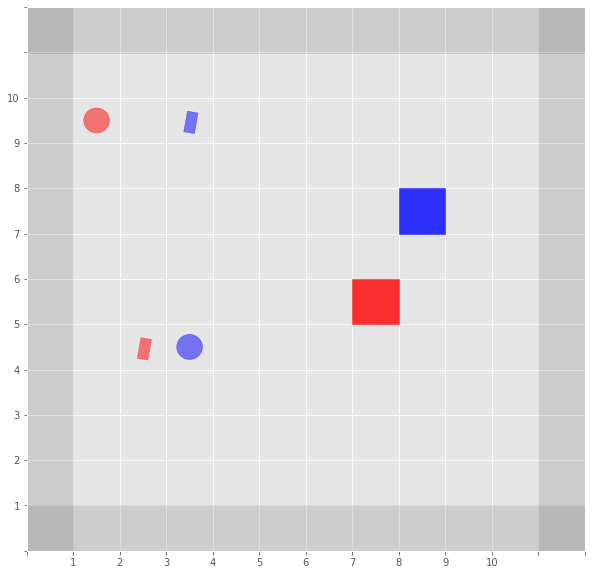

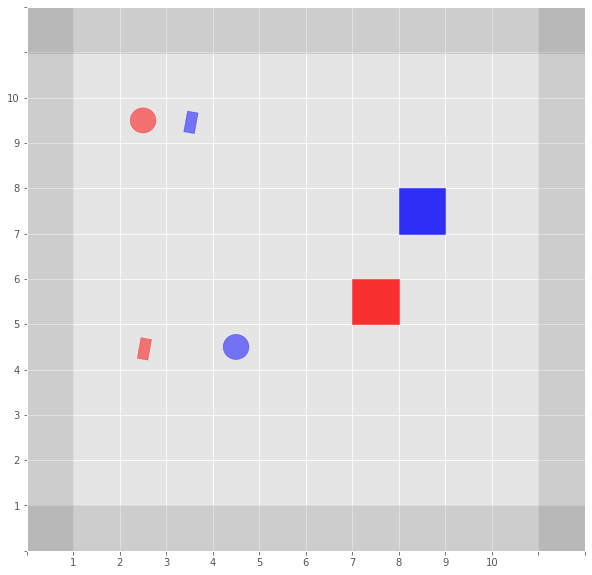

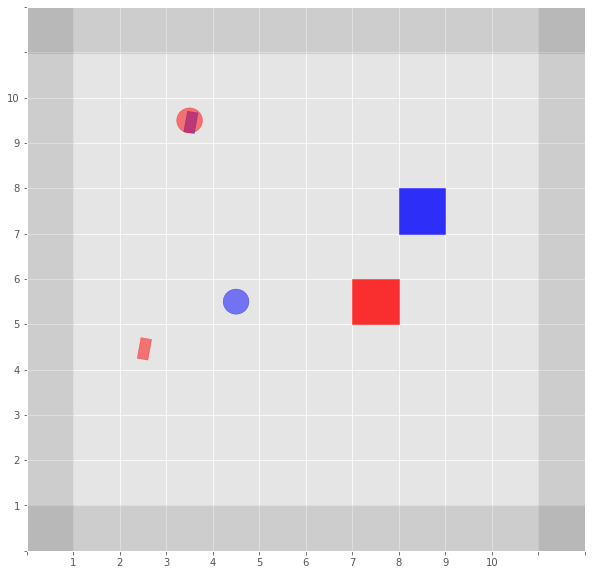

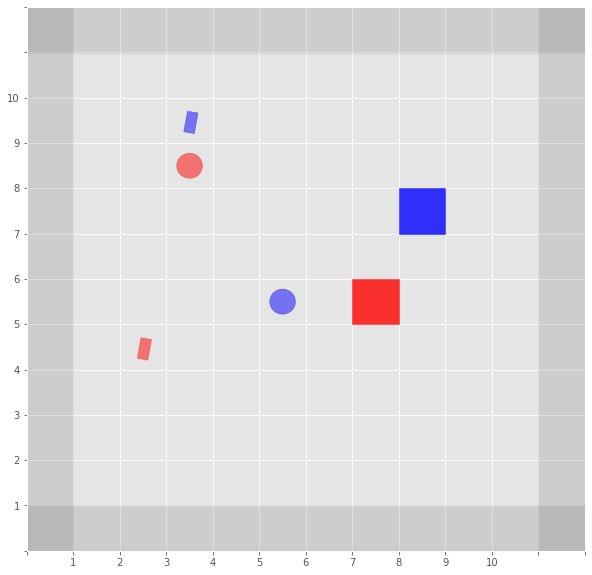

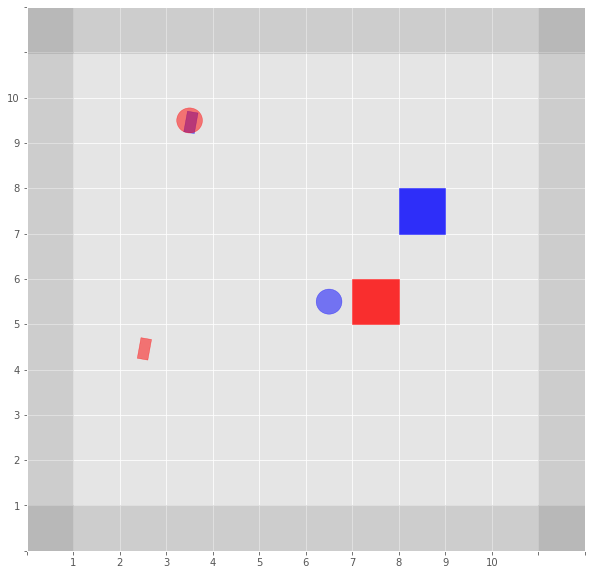

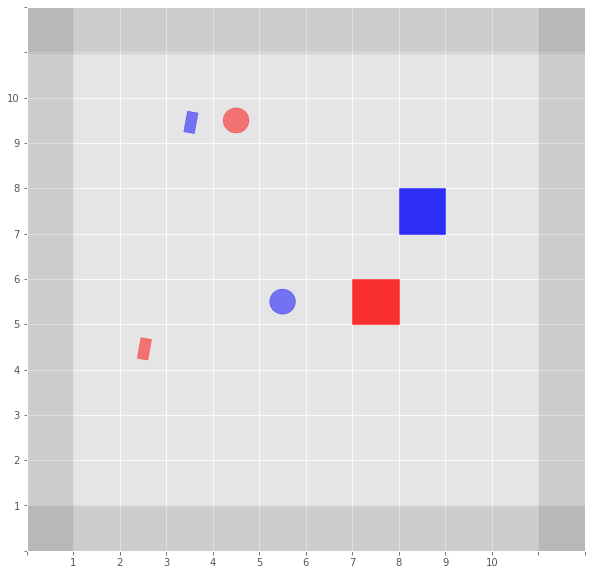

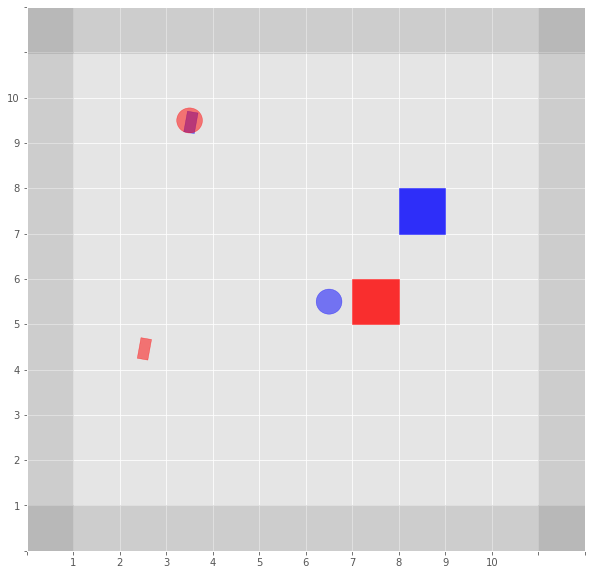

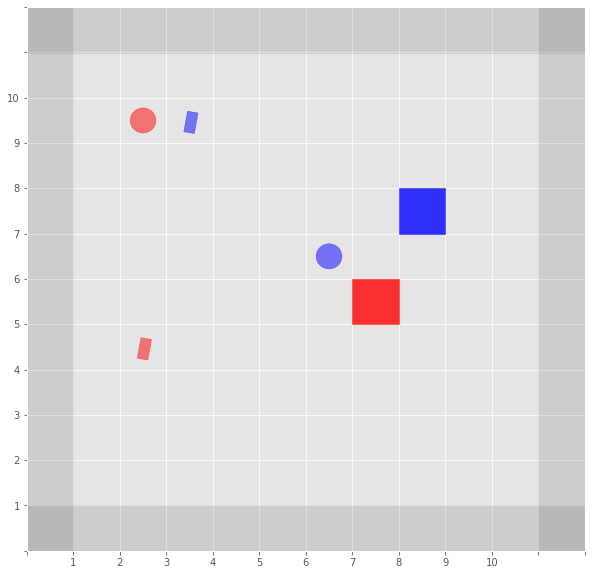

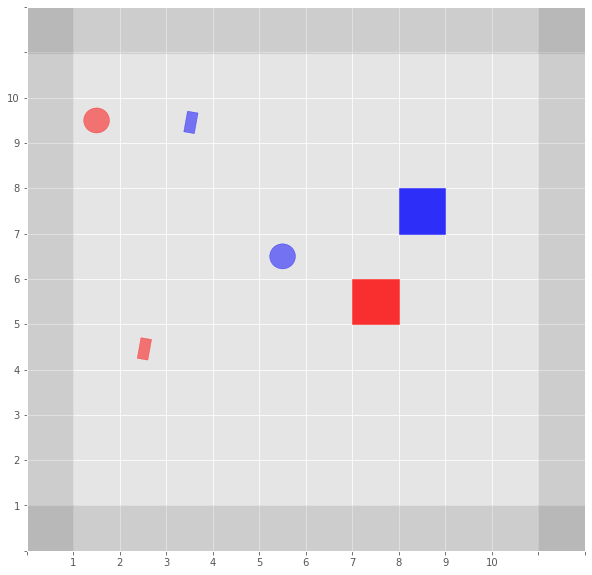

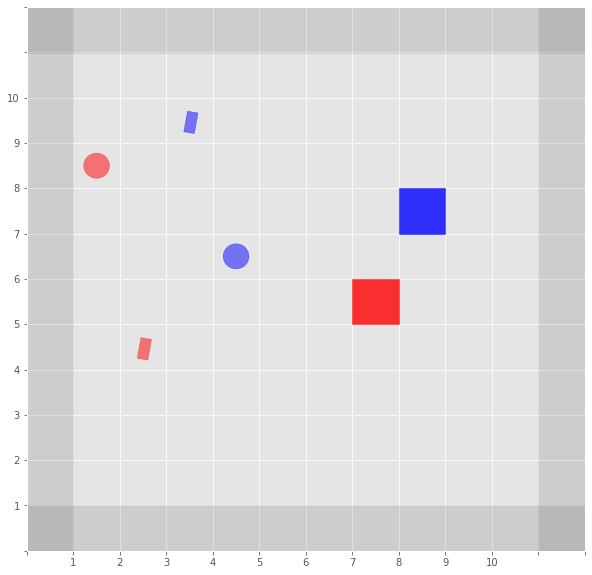

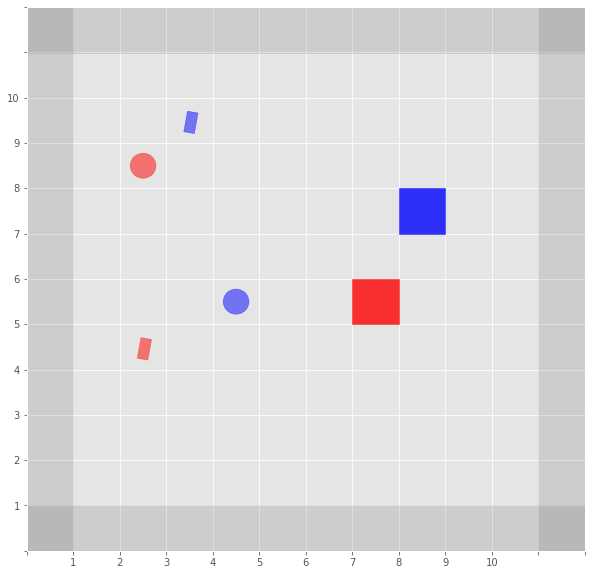

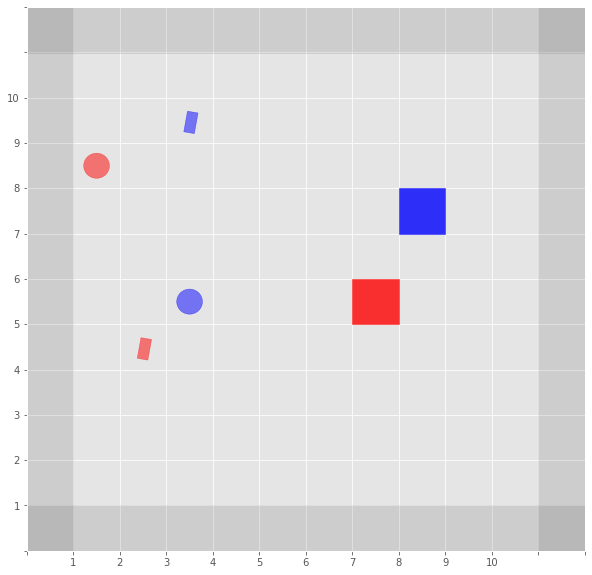

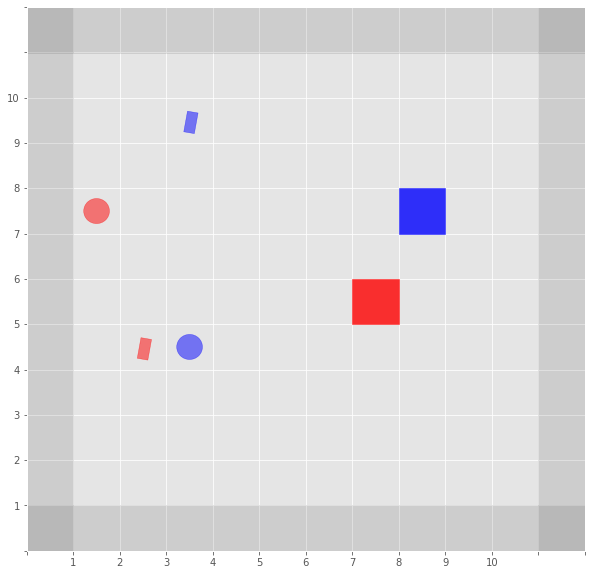

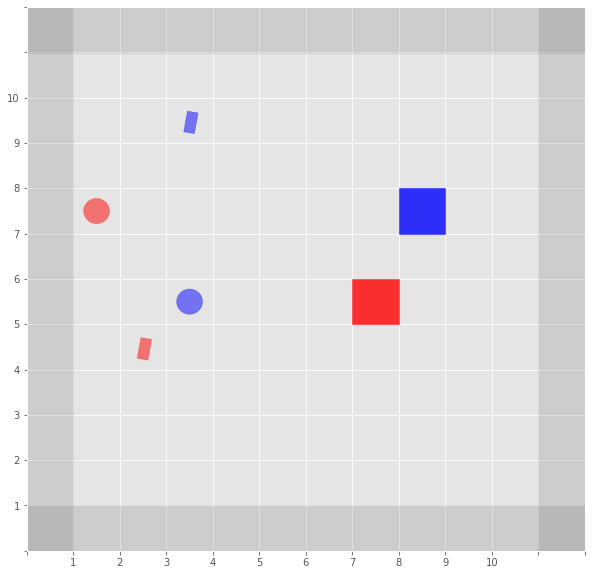

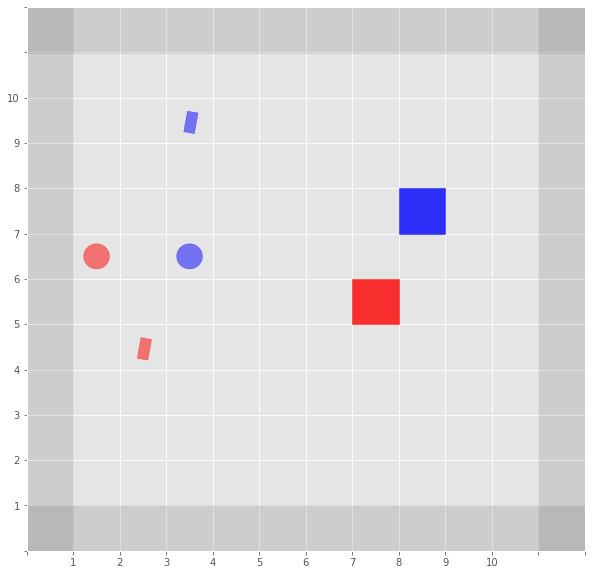

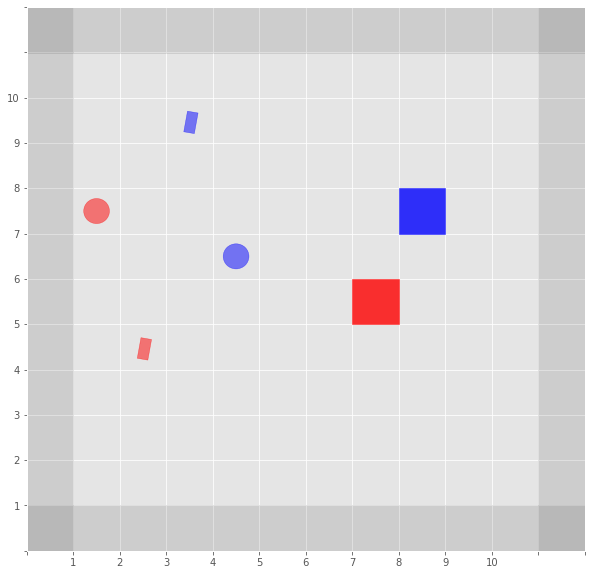

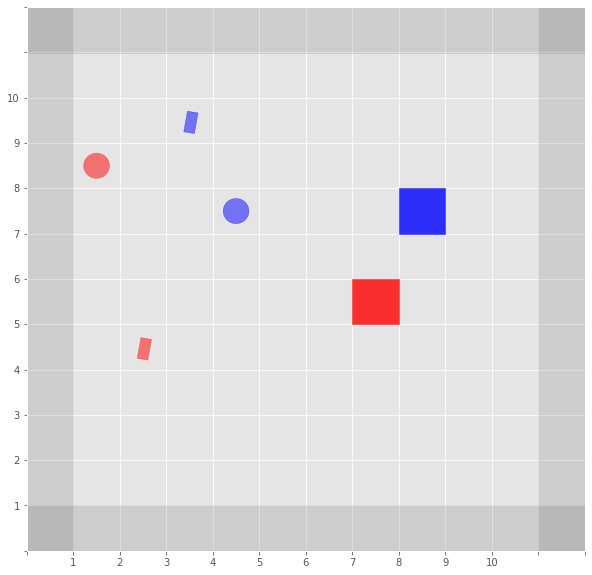

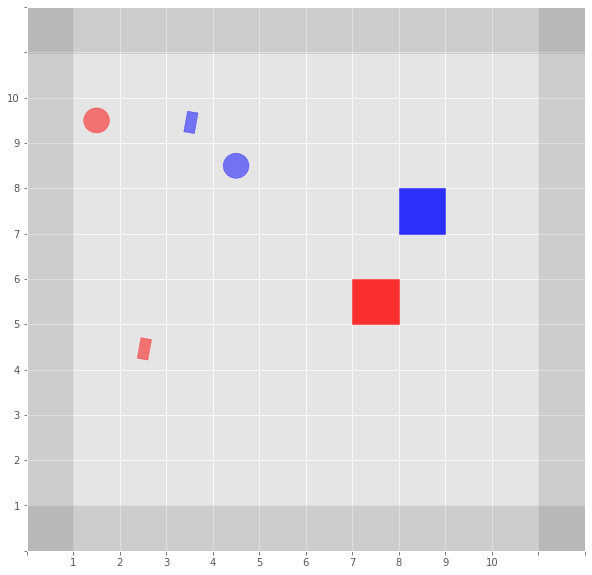

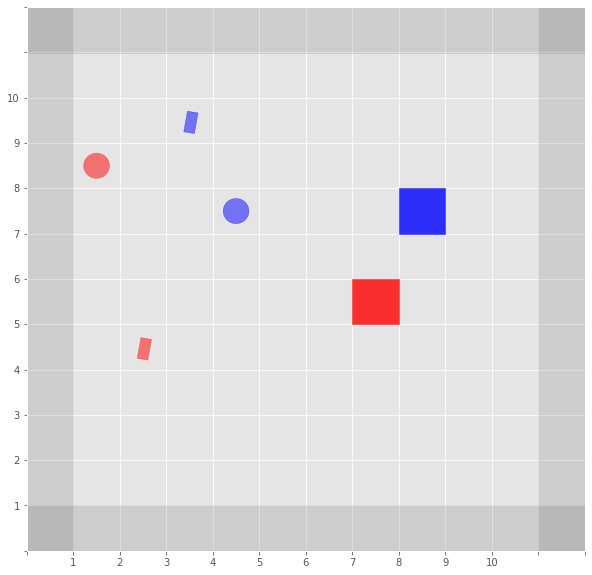

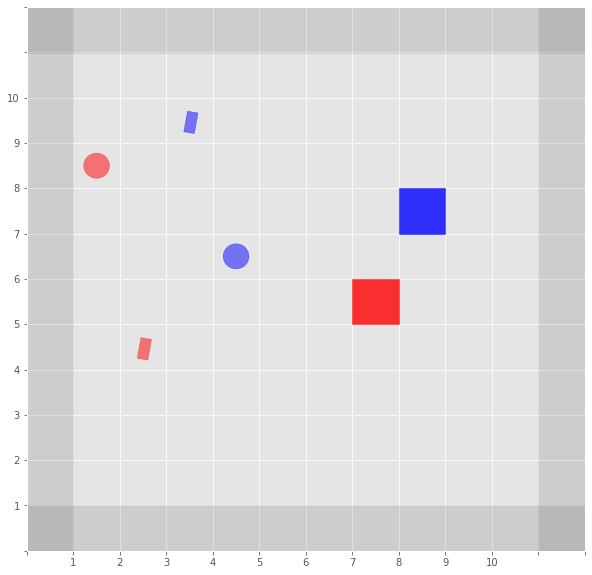

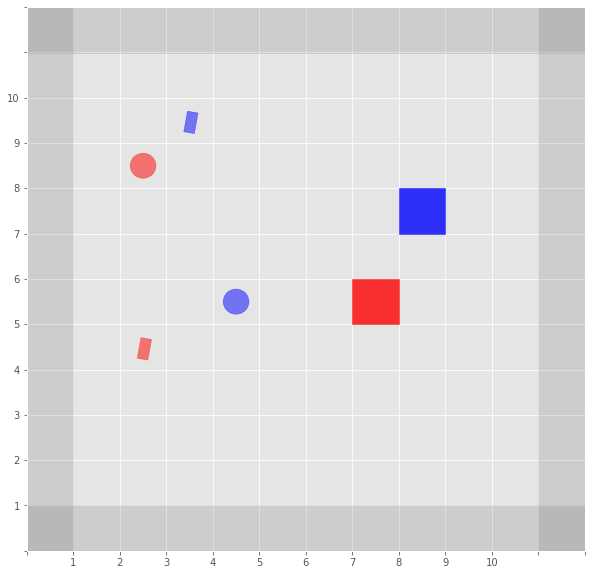

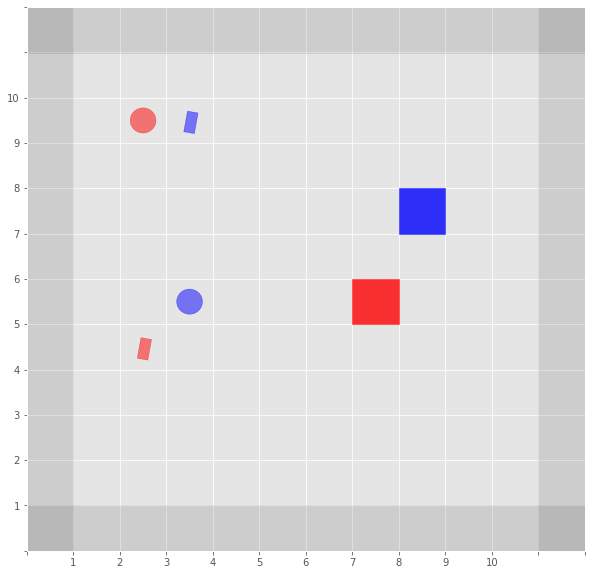

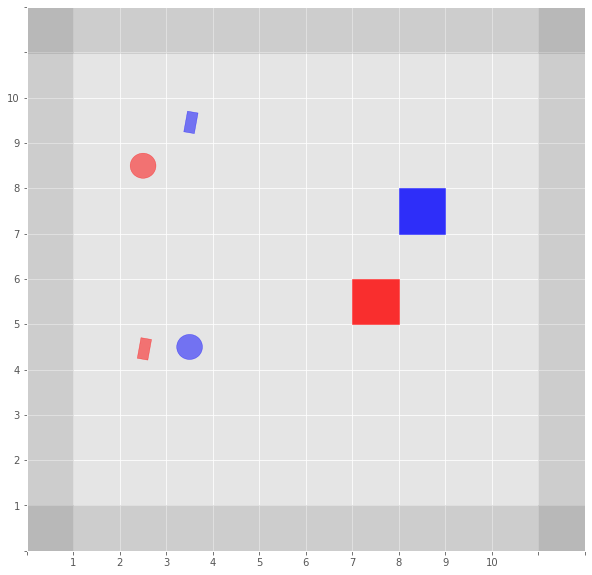

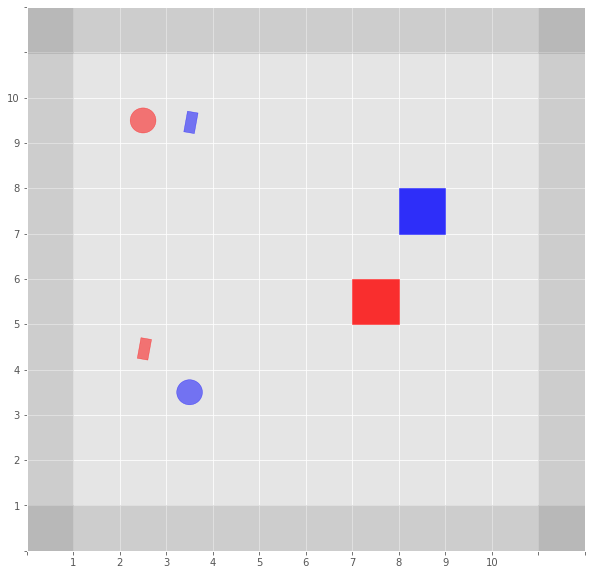

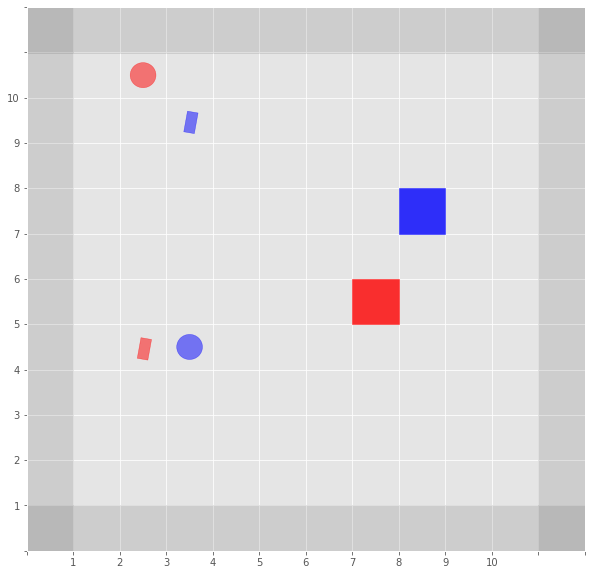

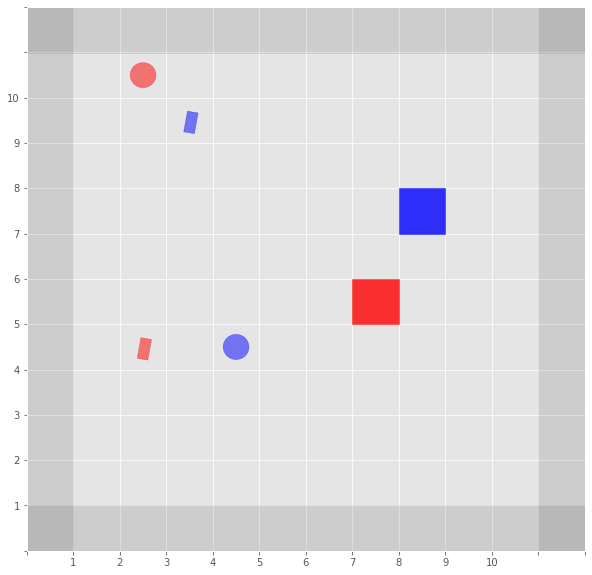

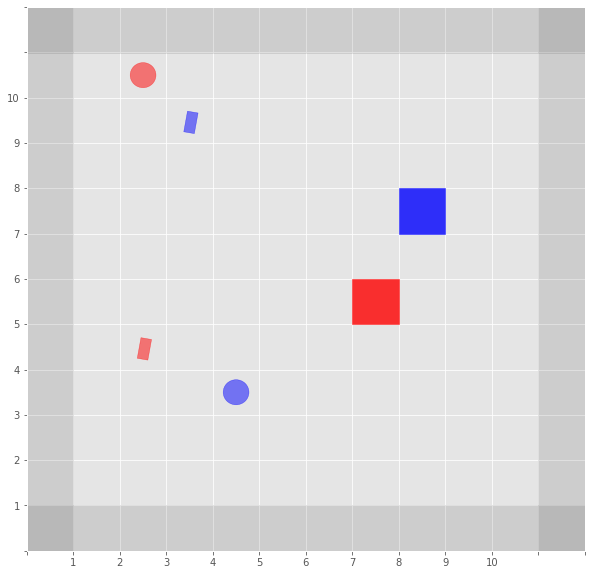

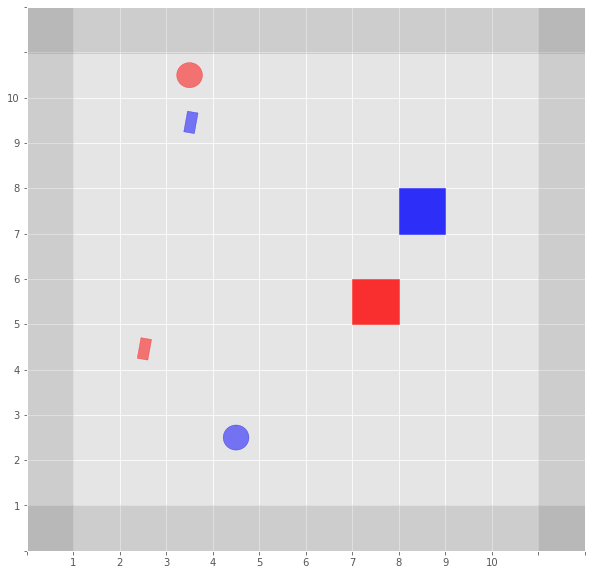

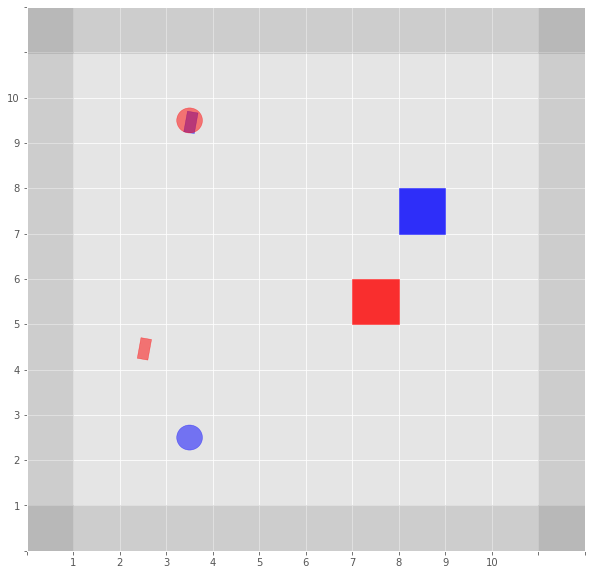

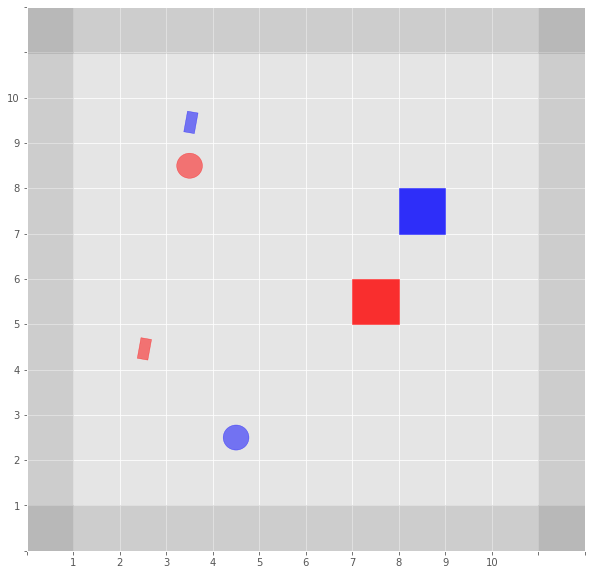

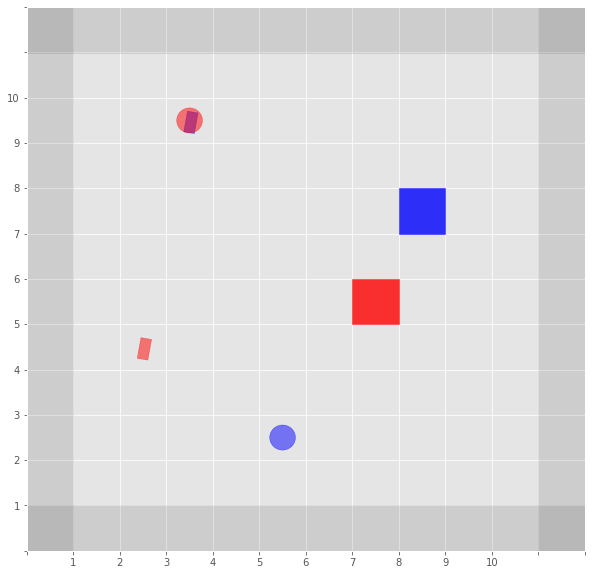

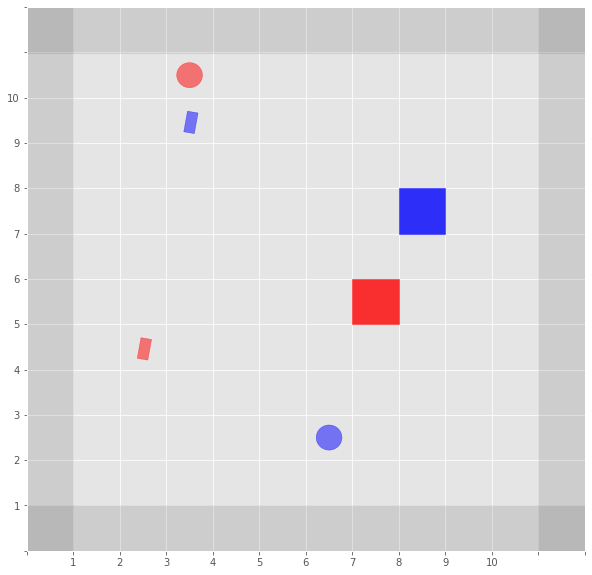

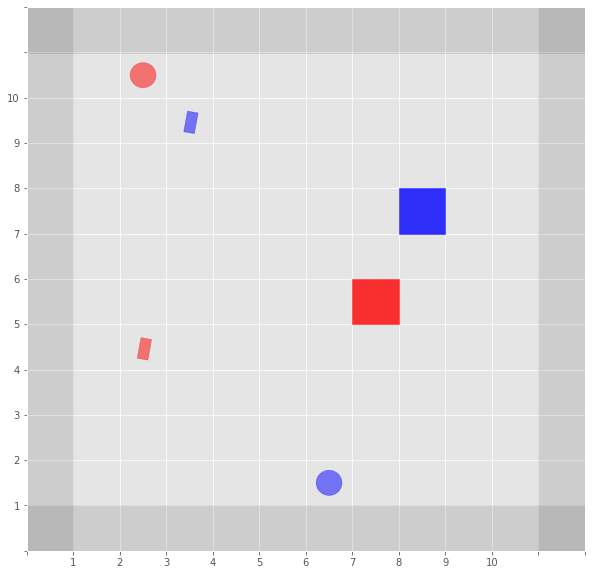

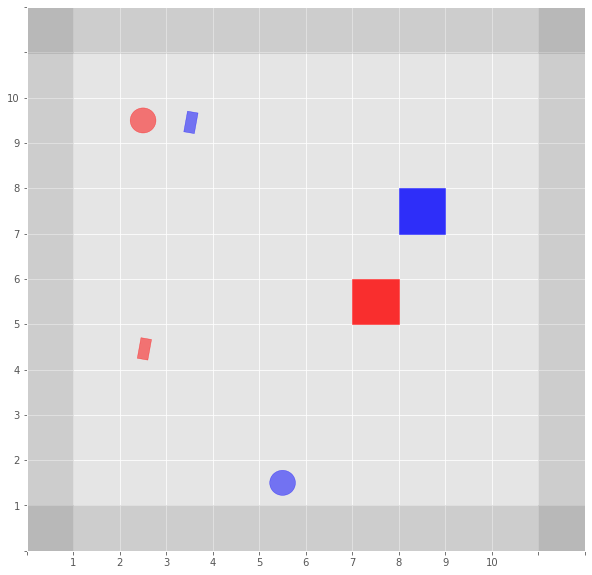

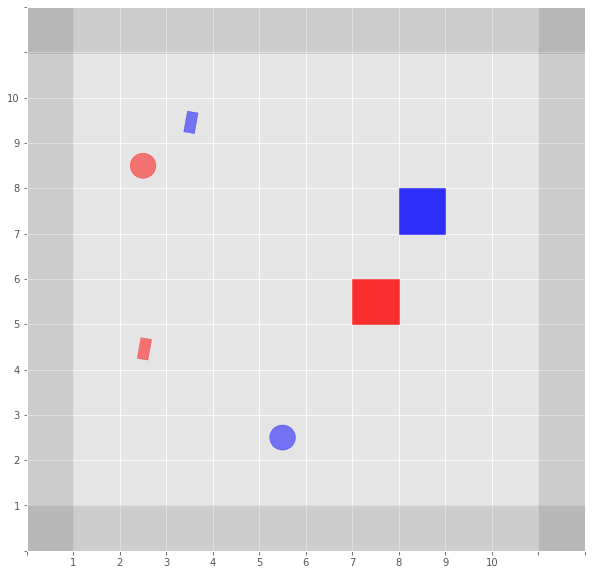

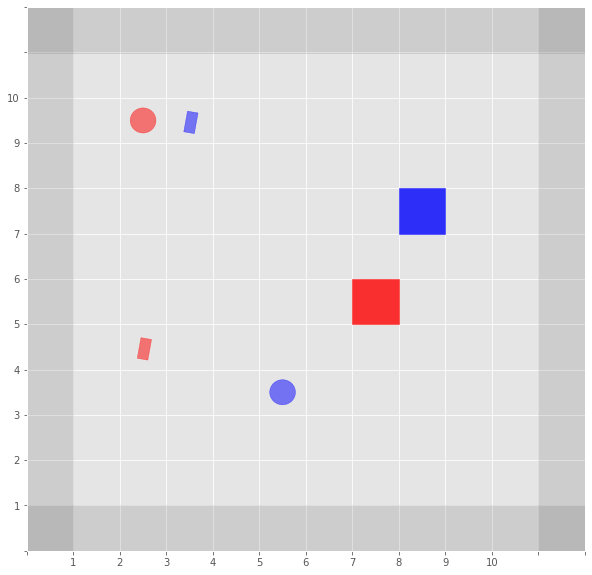

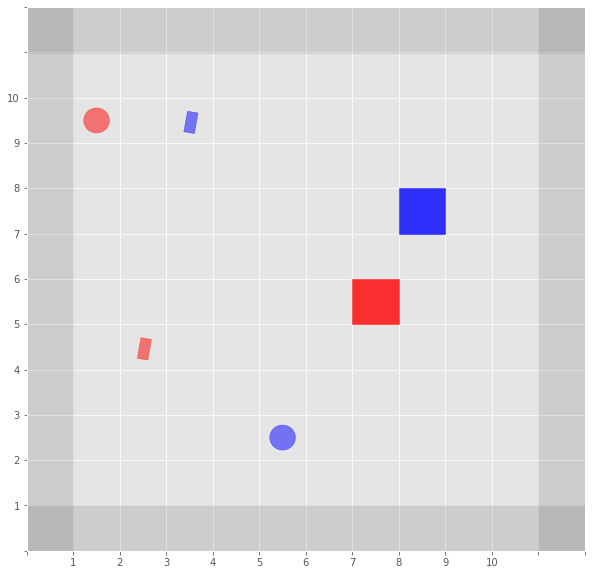

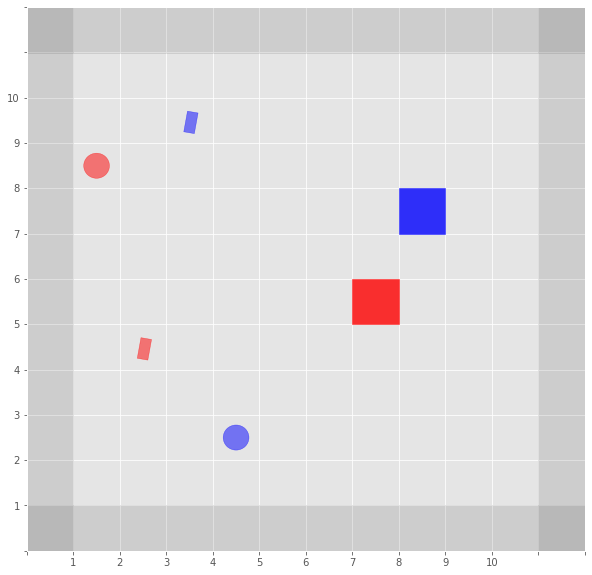

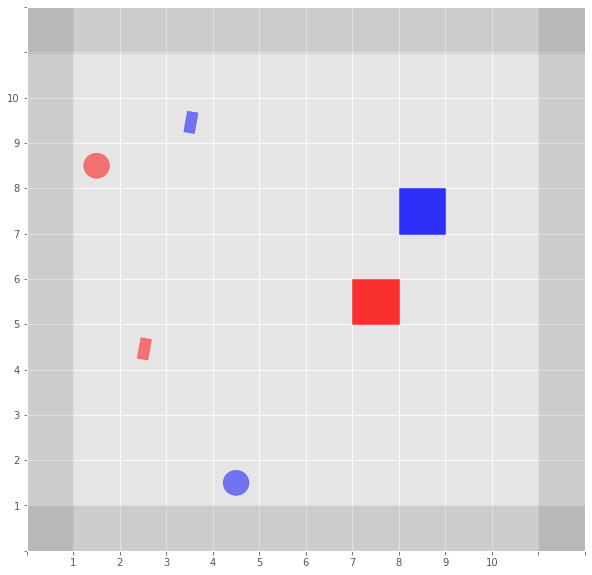

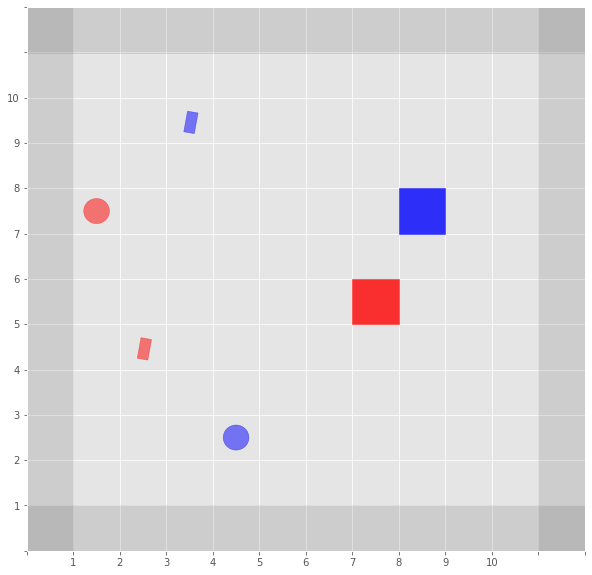

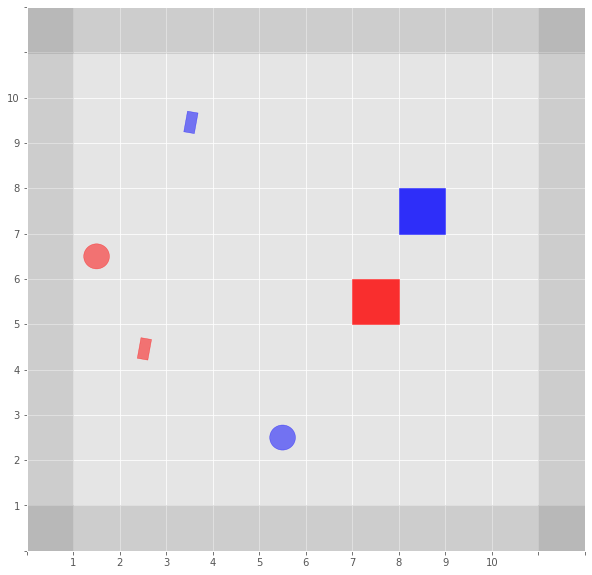

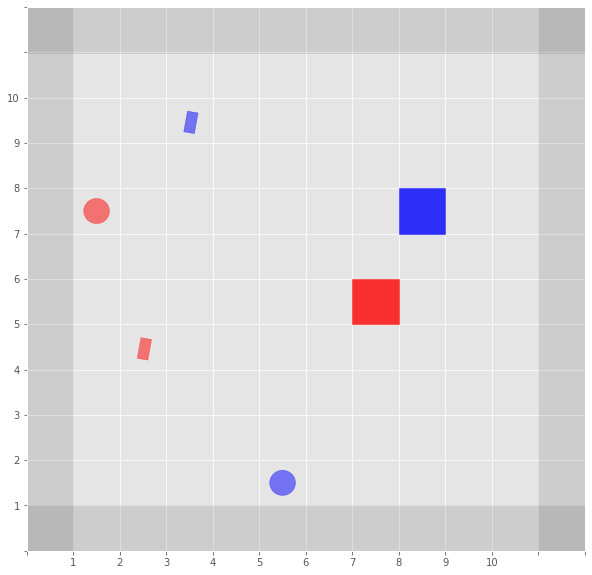

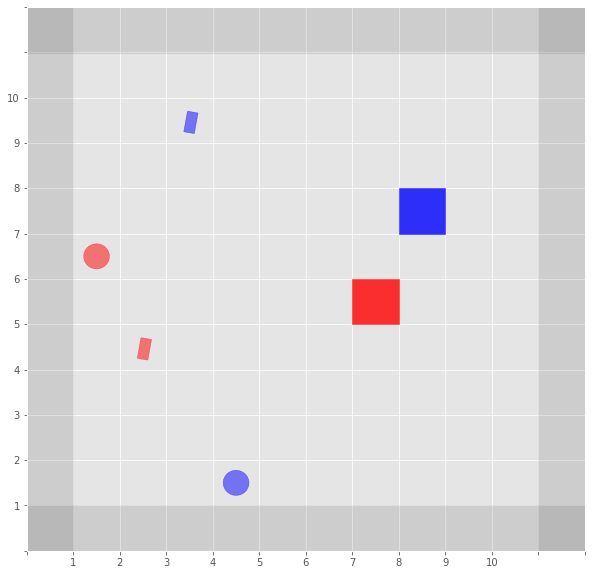

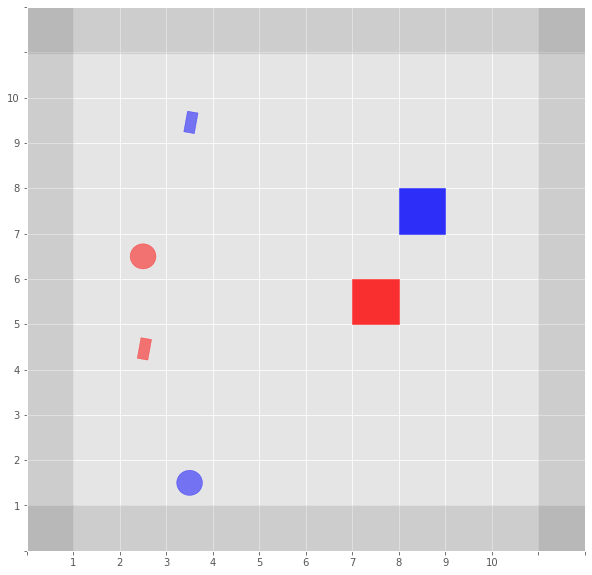

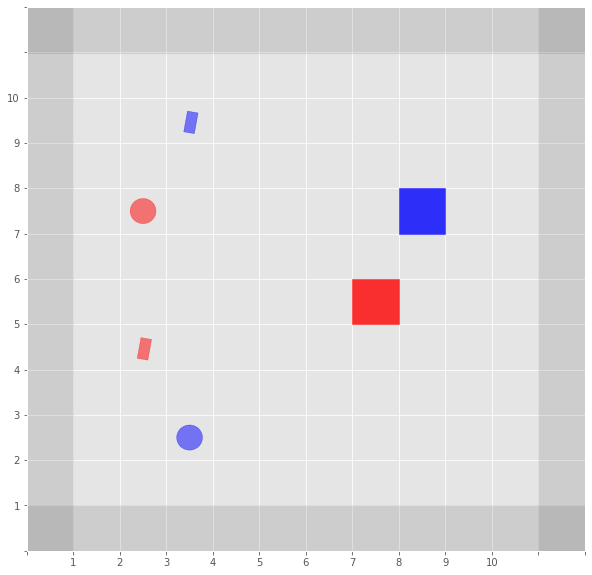

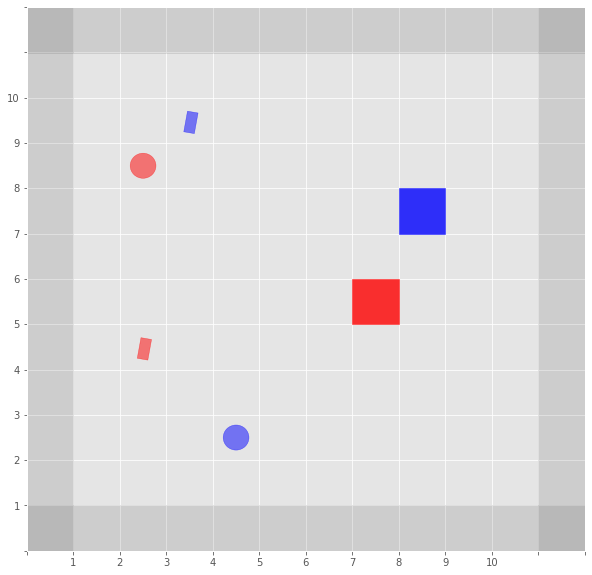

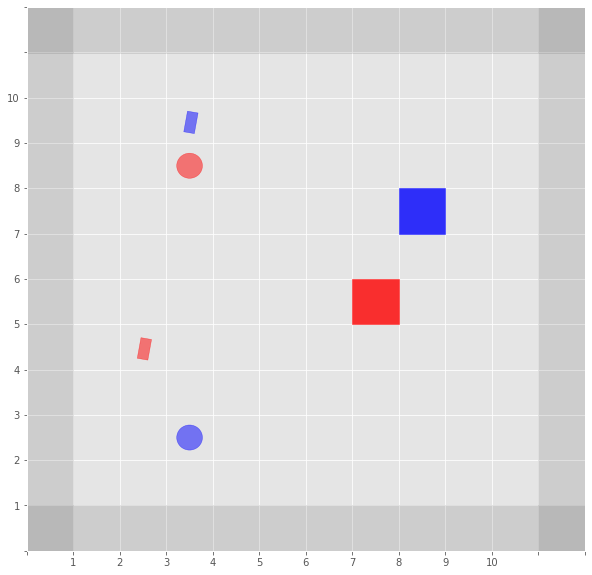

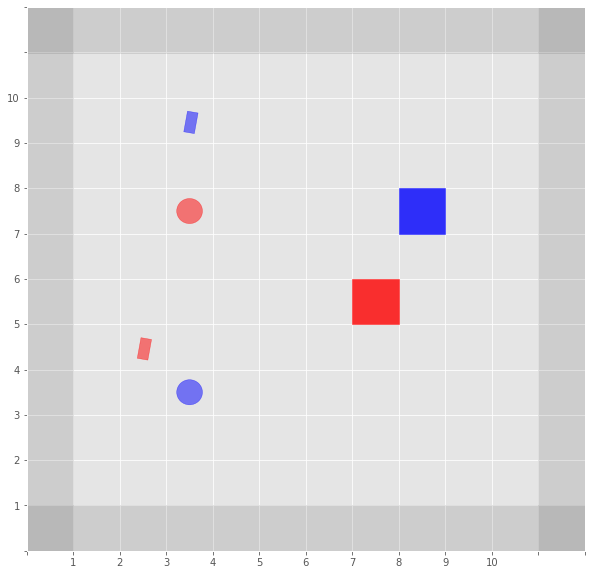

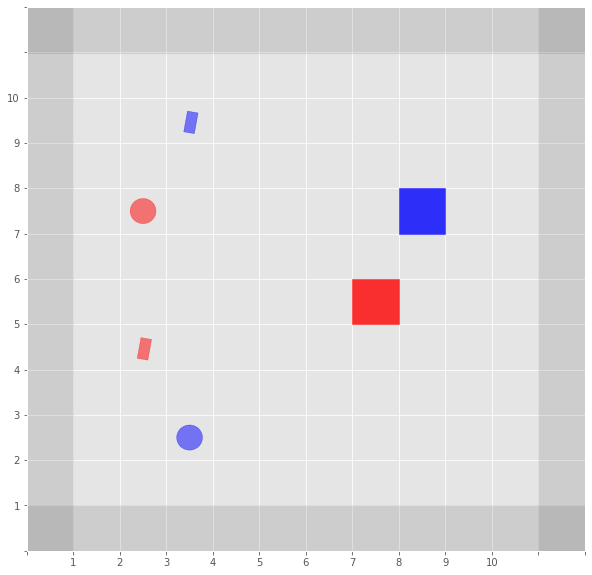

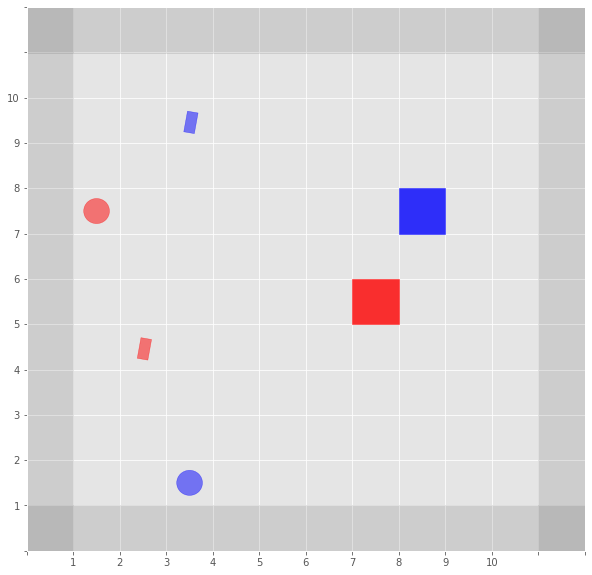

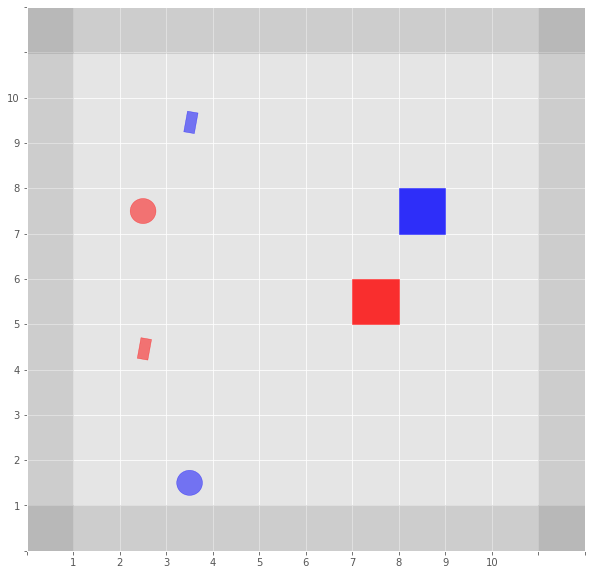

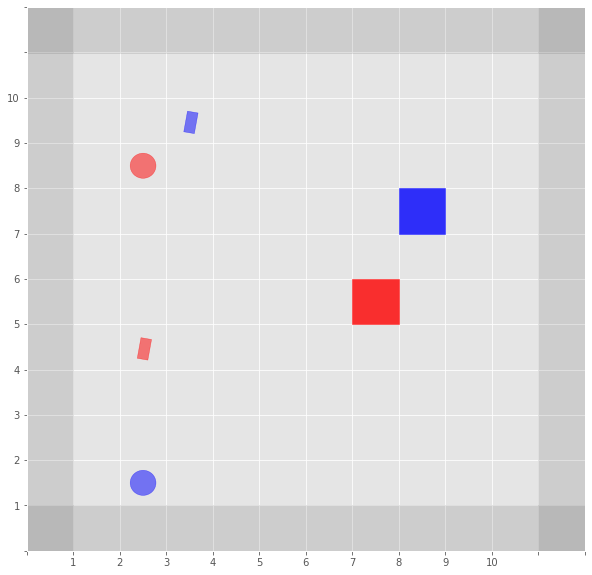

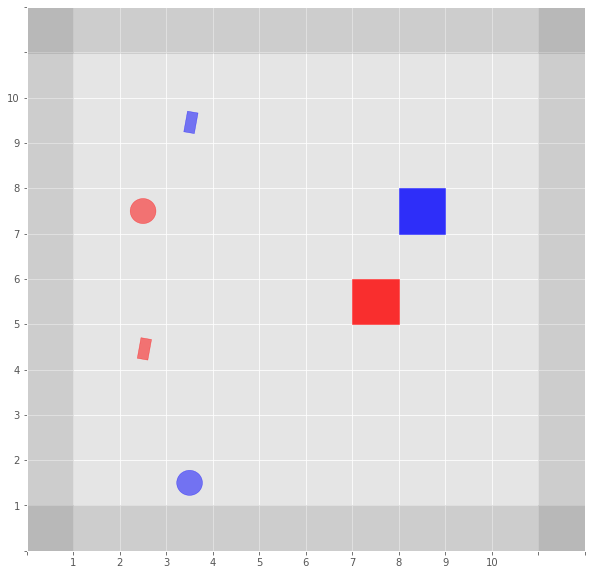

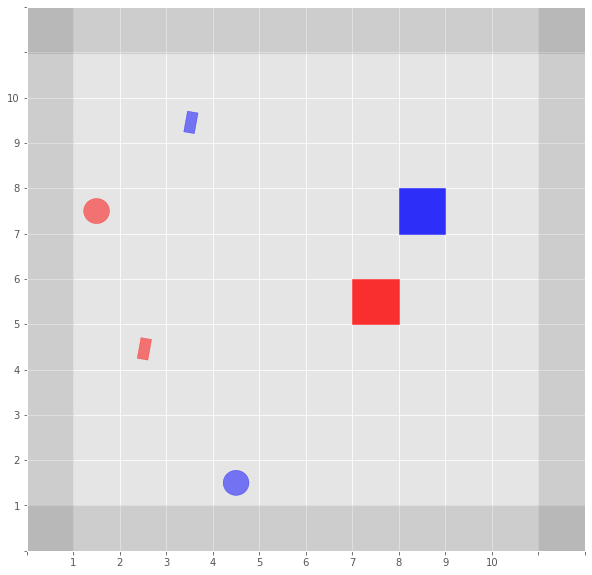

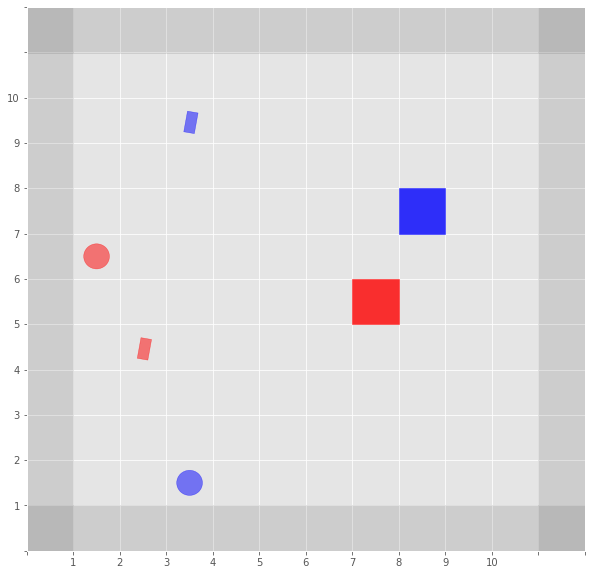

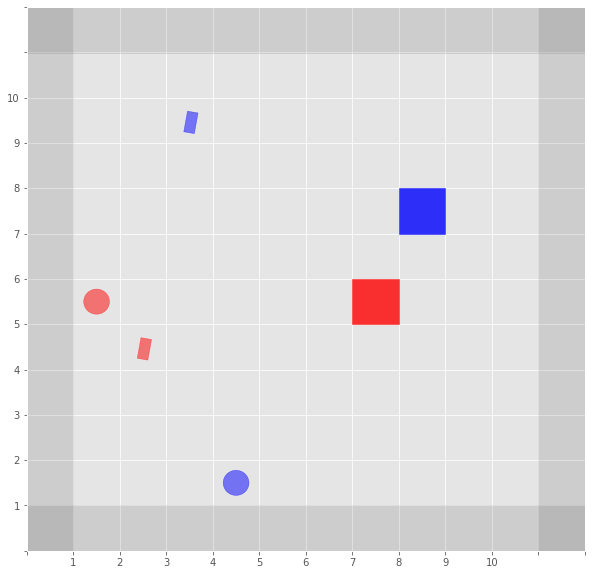

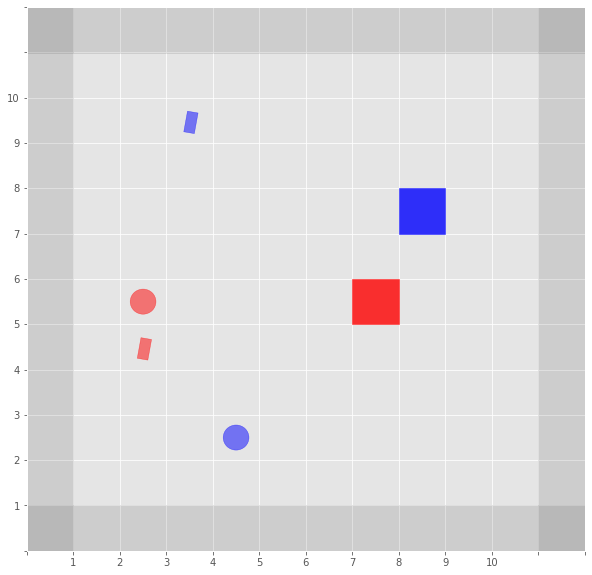

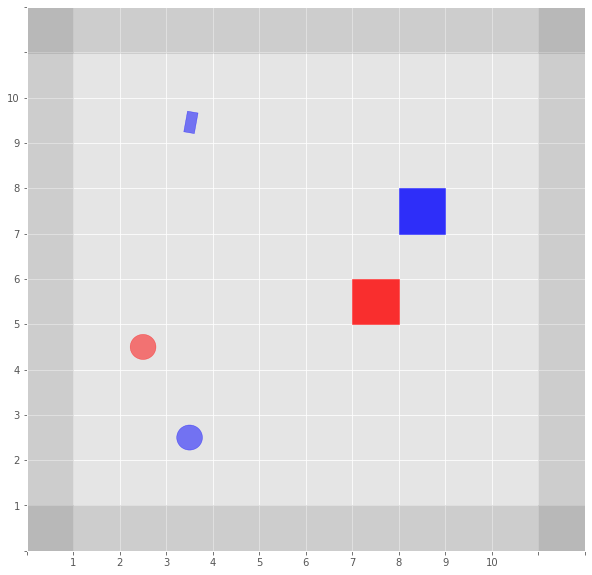

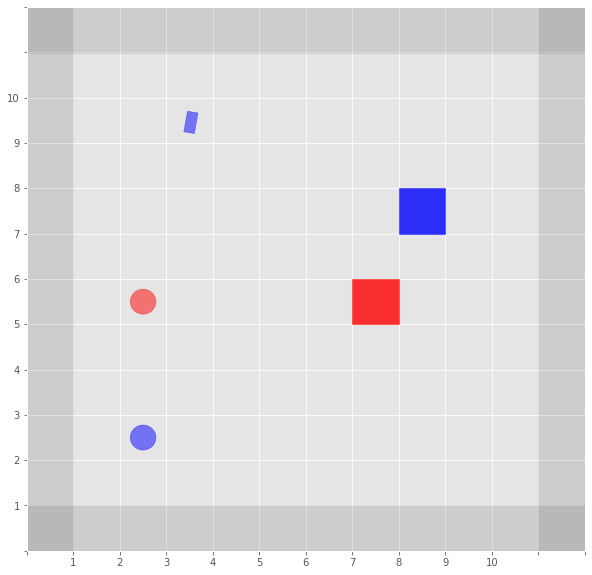

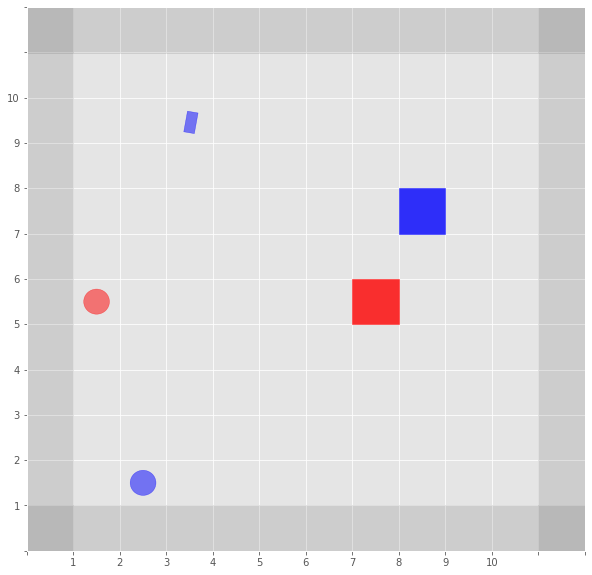

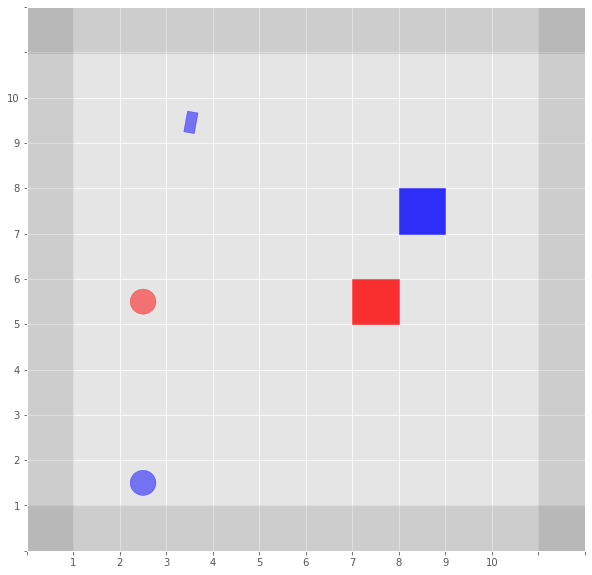

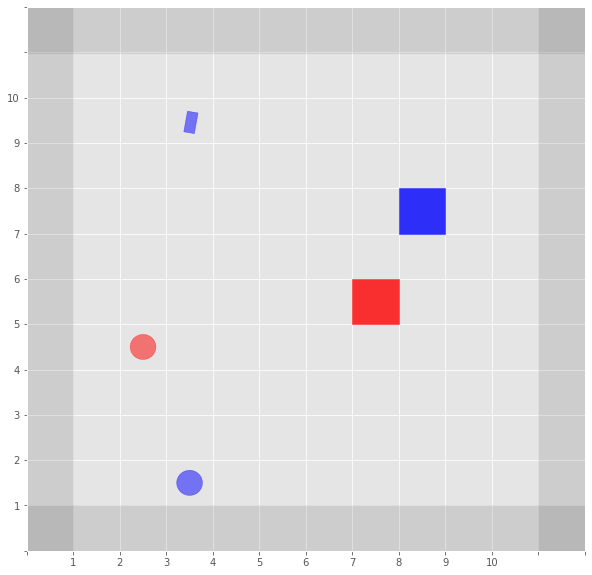

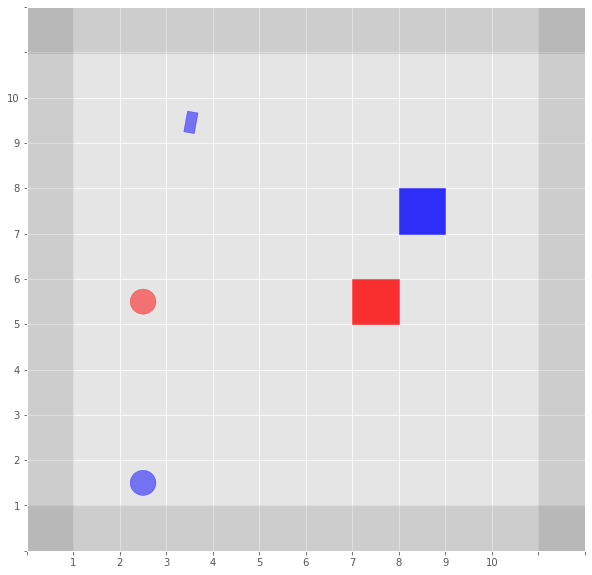

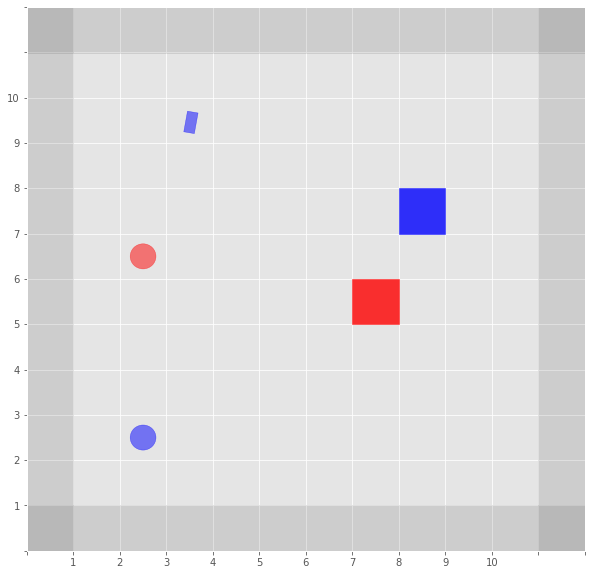

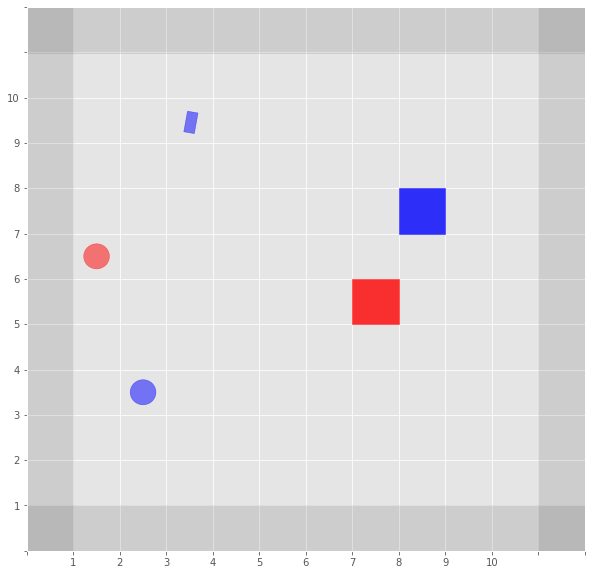

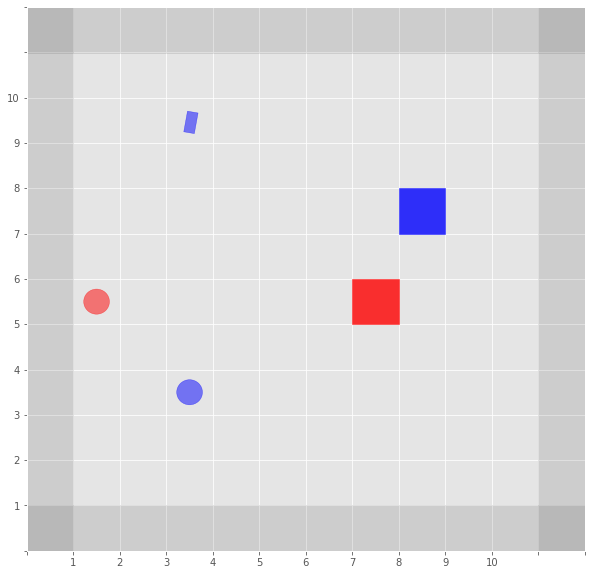

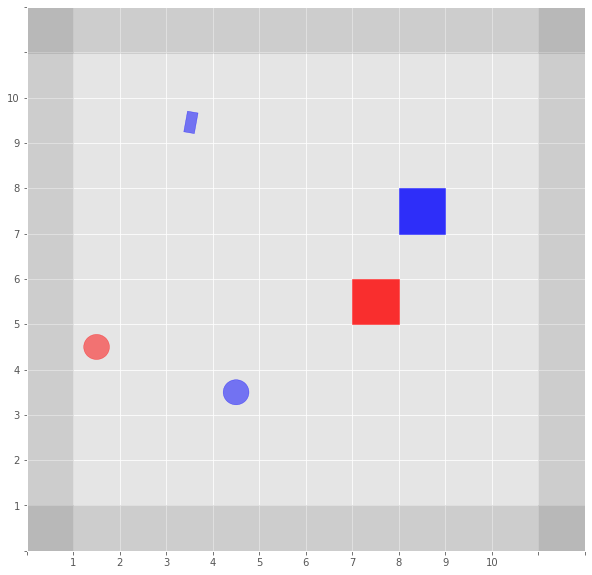

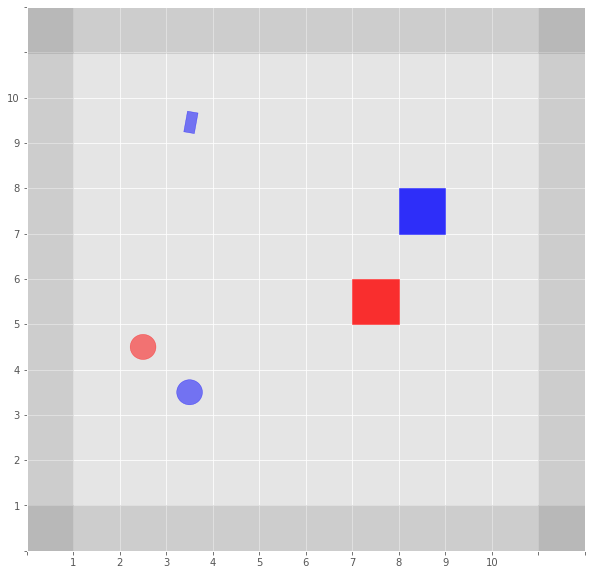

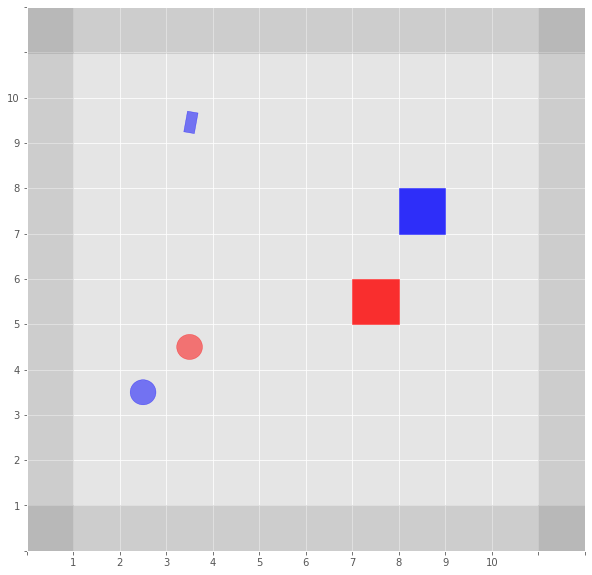

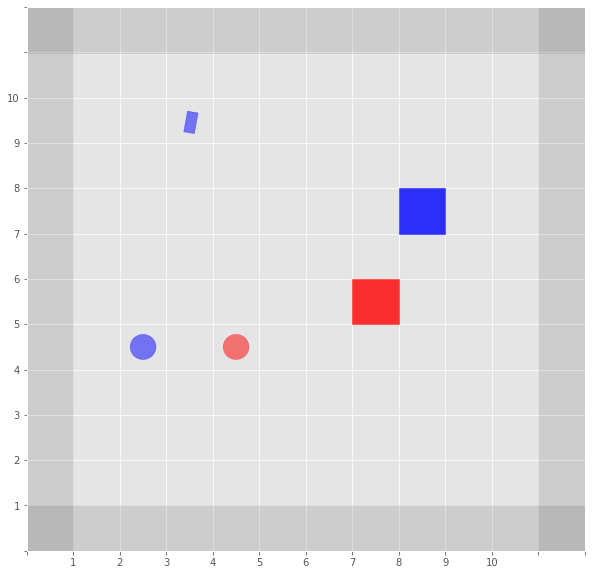

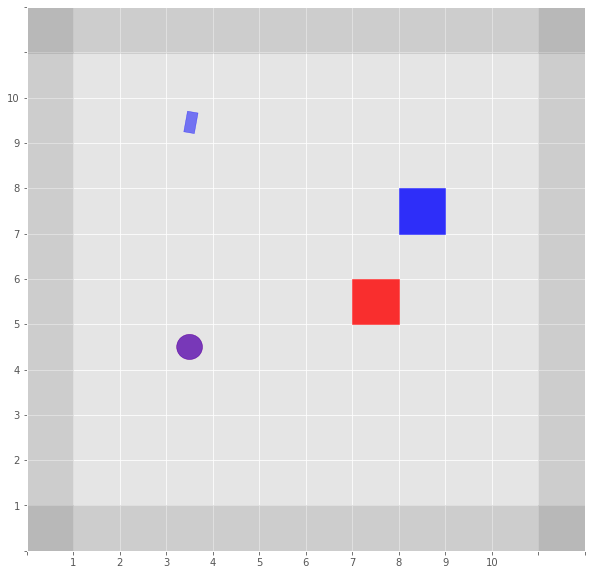

In [16]:
# random testing
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while done != [True, True]:
  action1=random.randint(0,3)
  action2=random.randint(0,3)
  state,reward,done,_=world.step([action1,action2])
  world.render()

[7, 5]